#### Including Relevant Libraries ####

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import statsmodels.formula.api as sm
import statsmodels.api as sm1
import datetime as dt
import scipy.stats as stats
from statsmodels.graphics.regressionplots import *
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

##### Defining Colors #####

In [2]:
# some nicer colors from http://colorbrewer2.org/
COLOR1 = '#7fc97f'
COLOR2 = '#beaed4'
COLOR3 = '#fdc086'
COLOR4 = '#ffff99'
COLOR5 = '#386cb0'
COLOR6 = '#2c7fb8'
COLOR7 = '#d95f0e'
COLOR8 = '#31a354'
COLOR9 = '#fdae6b'
COLOR10 = '#f03b20'

# Green shades
COLOR11 = '#edf8e9'
COLOR12 = '#bae4b3'
COLOR13 = '#74c476'
COLOR14 = '#31a354'
COLOR15 = '#006d2c'

# Blue shades
COLOR16 = '#eff3ff'
COLOR17 = '#bdd7e7'
COLOR18 = '#6baed6'
COLOR19 = '#3182bd'
COLOR20 = '#08519c'

# Red shades
COLOR21 = '#fee5d9'
COLOR22 = '#fcae91'
COLOR23 = '#fb6a4a'
COLOR24 = '#de2d26'
COLOR25 = '#a50f15'

# Purple shades
COLOR26 = '#f2f0f7'
COLOR27 = '#cbc9e2'
COLOR28 = '#9e9ac8'
COLOR29 = '#756bb1'
COLOR30 = '#54278f'

# Other Shades
COLOR31 = '#7fc97f'
COLOR32 = '#beaed4'
COLOR33 = '#fdc086'
COLOR34 = '#ffff99'
COLOR35 = '#386cb0'

COLOR36 = '#b3e2cd'
COLOR37 = '#fdcdac'
COLOR38 = '#cbd5e8'
COLOR39 = '#f4cae4'
COLOR40 = '#fed9a6'

In [3]:
# seaborn settings
sns.set_palette('deep', desat=0.6)
sns.set_context(rc={"figure.figsize": (8,4)})
sns.set_style("whitegrid")

##### Importing Datasets #####

In [4]:
# Import Melbourne Housing data into pandas
melHousing = pd.read_csv('../../MyBriefCase/SpringBoard/CapstoneProject/Melbourne Housing Market/Melbourne_housing_V7.csv'
                         , index_col = None, parse_dates = True)

# Replace NaN with Blank
#melHousing = melHousing.fillna('')

melHousing.head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude
0,Abbotsford,68 Studley St,2.0,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra,-37.8014,144.9958
1,Abbotsford,85 Turner St,2.0,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984
2,Abbotsford,25 Bloomburg St,2.0,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934
3,Abbotsford,18/659 Victoria St,3.0,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra,-37.8114,145.0116
4,Abbotsford,5 Charles St,3.0,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944


##### Categorizing Suburbs mainly into 5 regions - East, West, North, South & Central #####

In [5]:
# Import Melbourne Suburb, City and Region municipalities
melSuburbRegion = pd.read_csv('../../MyBriefCase/SpringBoard/CapstoneProject/Melbourne Housing Market/Melbourne_Suburb_Region.csv', index_col = None)

# Replace NaN with Blank
#melSuburbRegion = melSuburbRegion.fillna('')

melSuburbRegion.head(5)

,Suburb,City,Region
0,Abbotsford,Yarra,Central
1,Aberfeldie,Moonee Valley,North
2,Airport West,Moonee Valley,North
3,Albert Park,Port Phillip,Central
4,Albion,Brimbank,West


##### Merging the Datasets #####

In [6]:
melHousing = pd.merge(melHousing, melSuburbRegion, on='Suburb')
melHousing

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,City,Region
0,Abbotsford,68 Studley St,2.0,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra,-37.8014,144.9958,Yarra,Central
1,Abbotsford,85 Turner St,2.0,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Yarra,Central
2,Abbotsford,25 Bloomburg St,2.0,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Yarra,Central
3,Abbotsford,18/659 Victoria St,3.0,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra,-37.8114,145.0116,Yarra,Central
4,Abbotsford,5 Charles St,3.0,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Yarra,Central
5,Abbotsford,40 Federation La,3.0,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Yarra,Central
6,Abbotsford,55a Park St,4.0,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Yarra,Central
7,Abbotsford,16 Maugie St,4.0,h,NaN,SN,Nelson,6/08/2016,2.5,3067.0,...,2.0,2.0,400.0,220.0,2006.0,Yarra,-37.7965,144.9965,Yarra,Central
8,Abbotsford,53 Turner St,2.0,h,NaN,S,Biggin,6/08/2016,2.5,3067.0,...,1.0,2.0,201.0,NaN,1900.0,Yarra,-37.7995,144.9974,Yarra,Central
9,Abbotsford,99 Turner St,2.0,h,NaN,S,Collins,6/08/2016,2.5,3067.0,...,2.0,1.0,202.0,NaN,1900.0,Yarra,-37.7996,144.9989,Yarra,Central


#### Data Wrangling & Cleaning ####

In [7]:
#Removing junk Suburb records
melHousing = melHousing[melHousing['Suburb'].str.strip() != 'RE']
melHousing.count()

Suburb          12089
Address         12089
Rooms           12089
Type            12089
Price            9421
Method          12089
SellerG         12089
Date            12089
Distance        12089
Postcode        12089
Bedroom2         9541
Bathroom         9541
Car              9541
Landsize         9532
BuildingArea     5395
YearBuilt        6171
CouncilArea      9532
Lattitude        9626
Longtitude       9626
City            12089
Region          12089
dtype: int64

** Properties with Missing 'Price' are removed from the dataset to avoid wrong prediction/calculation **

In [8]:
melHousing = melHousing.dropna(subset=['Price']) 
melHousing.count()

Suburb          9421
Address         9421
Rooms           9421
Type            9421
Price           9421
Method          9421
SellerG         9421
Date            9421
Distance        9421
Postcode        9421
Bedroom2        7443
Bathroom        7443
Car             7443
Landsize        7436
BuildingArea    4152
YearBuilt       4761
CouncilArea     7436
Lattitude       7506
Longtitude      7506
City            9421
Region          9421
dtype: int64

** Missing 'Price' of any Property has been replaced with 'Mean' Price of the Properties in a Suburb **

In [9]:
#melHousing["Price"] = melHousing.groupby(['Suburb'])['Price'].transform(lambda x: x.fillna(x.mean()))

** Missing 'Landsize' of any Property has been replaced with 'Median' Landsize of the Properties in a Suburb **

In [10]:
melHousing["Landsize"] = melHousing.groupby(['Suburb'])['Landsize'].transform(lambda x: x.fillna(x.median()))

In [11]:
melHousing[melHousing['Suburb'] == 'Abbotsford']

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,City,Region
1,Abbotsford,85 Turner St,2.0,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Yarra,Central
2,Abbotsford,25 Bloomburg St,2.0,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Yarra,Central
4,Abbotsford,5 Charles St,3.0,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Yarra,Central
5,Abbotsford,40 Federation La,3.0,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Yarra,Central
6,Abbotsford,55a Park St,4.0,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Yarra,Central
10,Abbotsford,129 Charles St,2.0,h,941000.0,S,Jellis,7/05/2016,2.5,3067.0,...,1.0,0.0,181.0,NaN,NaN,Yarra,-37.8041,144.9953,Yarra,Central
11,Abbotsford,124 Yarra St,3.0,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Yarra,Central
14,Abbotsford,98 Charles St,2.0,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Yarra,Central
15,Abbotsford,217 Langridge St,3.0,h,1000000.0,S,Jellis,8/10/2016,2.5,3067.0,...,NaN,NaN,147.0,NaN,NaN,NaN,NaN,NaN,Yarra,Central
16,Abbotsford,18a Mollison St,2.0,t,745000.0,S,Jellis,8/10/2016,2.5,3067.0,...,NaN,NaN,147.0,NaN,NaN,NaN,NaN,NaN,Yarra,Central


** Format the Date field **

In [12]:
melHousing['Date'] = pd.to_datetime(melHousing['Date']).dt.strftime('%m/%d/%Y')
melHousing['Date']

1        03/12/2016
2        04/02/2016
4        04/03/2017
5        04/03/2017
6        04/06/2016
10       07/05/2016
11       07/05/2016
14       08/10/2016
15       08/10/2016
16       08/10/2016
17       08/10/2016
18       08/10/2016
19       08/10/2016
21       10/12/2016
22       10/12/2016
23       12/11/2016
24       12/11/2016
25       12/11/2016
26       12/11/2016
27       12/11/2016
28       08/13/2016
29       05/14/2016
30       10/15/2016
32       07/16/2016
33       07/16/2016
35       07/16/2016
36       09/17/2016
37       09/17/2016
38       03/18/2017
40       03/18/2017
            ...    
12056    09/17/2016
12057    09/17/2016
12058    04/23/2016
12059    02/25/2017
12060    06/27/2016
12061    08/10/2016
12062    10/09/2016
12063    10/12/2016
12064    11/02/2017
12065    12/11/2016
12066    10/15/2016
12067    03/18/2017
12068    06/18/2016
12069    05/22/2016
12070    05/22/2016
12071    09/24/2016
12072    07/26/2016
12073    06/27/2016
12075    11/27/2016


###### Number of Houses by the Region ######

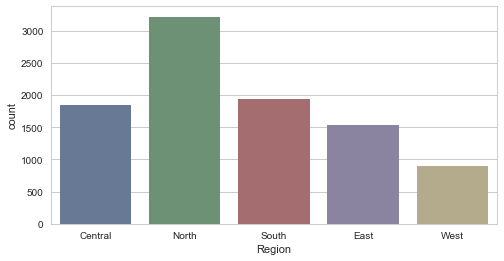

In [13]:
ax = sns.countplot(x="Region", data = melHousing)

###### Top 10 Suburbs by the number of Houses ######

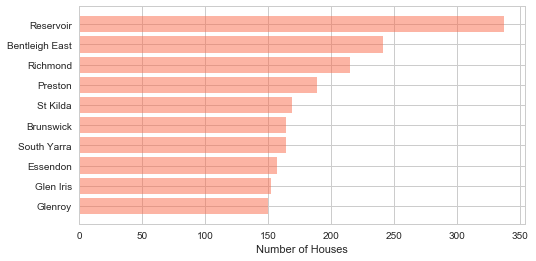

In [14]:
subHousing = melHousing.groupby(['Suburb']).size().sort_values().reset_index(name='Count') 
subHousingTop10 = subHousing.tail(10)
subHousingTop10

#Construct BAR-Chart 
y_pos = np.arange(len(subHousingTop10['Suburb'])) 
plt.barh(y_pos, subHousingTop10['Count'], align='center', alpha=0.5, color = COLOR23) 
plt.yticks(y_pos, subHousingTop10['Suburb']) 
plt.xlabel('Number of Houses') 
plt.show()

###### Would like to analyse 'Property Price' (Dependent Variable) on the basis of 6 Independent Variables - 'Property Type', 'Property Sold Date', 'Distance from CBD(Central Business District)', 'Landsize', 'Suburb Region' and 'Number of Room'.  There are other Independent Variables (IV) which can be considered. But adding more IV to a multiple regression procedure doesn't mean that regression would be "better" or offer better predictions. Infact it can make things worse. This phenomena is known as 'Overfitting' or 'Curse of Dimensionality'.  ######

** Analyzing relationships between IV and DV **

In [15]:
# Function to create customize Line-chart (with less spike)
def _getMeanPriceSmooth(lclDF, lclName, lclInterval=1):
    lclPred = lclDF[lclName]
    tmpArray = np.sort(lclPred.unique())
    maxIntVal = int(max(tmpArray))
    minIntVal = int(min(tmpArray))
    maxVal = max(tmpArray)
    minVal = min(tmpArray)
    
    dfArray = []
    for val in range(minIntVal,maxIntVal,lclInterval):
        meanPrice = lclDF[(lclPred >= val) & (lclPred < (val+lclInterval))]['Price'].mean()
        if meanPrice != 'nan': 
            if val == minIntVal:
                dfArray.append([minVal, meanPrice])
            else:
                dfArray.append([val, meanPrice])

    meanPriceAtMaxPred = lclDF[lclPred == maxVal]['Price'].mean()
    dfArray.append([maxVal, meanPriceAtMaxPred])
    
    #Form Dataframe
    tmpPropDF = pd.DataFrame(data = dfArray, columns = [lclName, 'Price']) 
    return tmpPropDF

In [16]:
# Function to create customize frequent spike Line-chart 
def _getMeanPrice(lclDF, lclName):
    lclDist = lclDF[lclName]
    tmpArray = np.sort(lclDist.unique())

    dfArray = []
    for val in tmpArray:
        meanPrice = lclDF[lclDist == val]['Price'].mean()
        dfArray.append([val, meanPrice])

    #Form Dataframe
    tmpPropDF = pd.DataFrame(data = dfArray, columns = [lclName, 'Price']) 
    return tmpPropDF

###### Scatterplot of 'Property Price' (Y) vs 'Landsize' (X) ######

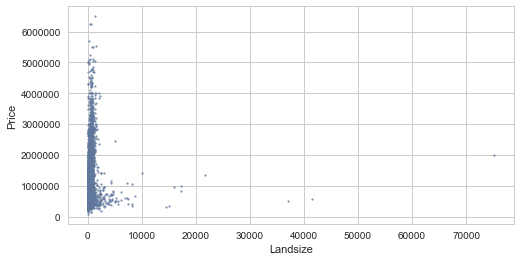

In [17]:
ax = sns.regplot(x=melHousing['Landsize'], y=melHousing['Price'], data=melHousing, scatter=True, fit_reg=False, scatter_kws={'s':5})

###### Scatterplot of 'Property Price' (Y) vs 'CBD' (X) ######

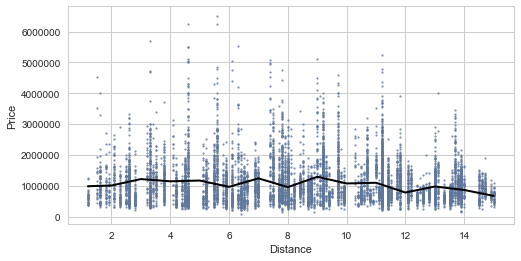

In [18]:
#Scatter Diagram
ax = sns.regplot(x=melHousing['Distance'], y=melHousing['Price'], data=melHousing, scatter=True, fit_reg=False, scatter_kws={'s':5})

#Line-Chart
tmpPropDF = _getMeanPriceSmooth(melHousing, 'Distance')
ax.plot(tmpPropDF['Distance'], tmpPropDF['Price'], color='Black', linewidth=2.0, linestyle="-")

** Scatterplot of 'Property Price'(Y) vs 'CBD'(X) with 'Region' distribution **

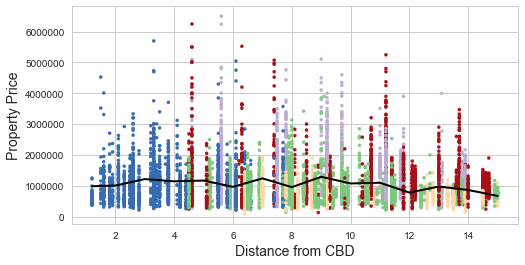

In [19]:
fig, ax = plt.subplots()
colors = {'Central':COLOR35, 'North':COLOR31, 'South':COLOR25, 'East':COLOR32, 'West':COLOR40}
#Scatter Diagram
ax.scatter(melHousing['Distance'], melHousing['Price'], c=melHousing['Region'].apply(lambda x: colors[x]), s = 10)

#Line-chart
tmpPropDF = _getMeanPriceSmooth(melHousing, 'Distance')
ax.plot(tmpPropDF['Distance'], tmpPropDF['Price'], color='Black', linewidth=2.0, linestyle="-")

ax.set_ylabel(r'Property Price', size = 14)
ax.set_xlabel(r'Distance from CBD', size = 14)
plt.show()

** Only CENTRAL **

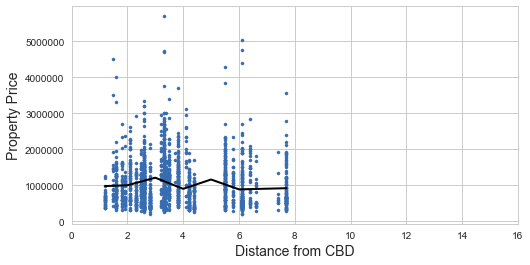

In [20]:
melHousingCentral = melHousing[melHousing['Region'] == 'Central']
fig, ax = plt.subplots()
#Scatter Diagram
ax.scatter(melHousingCentral['Distance'], melHousingCentral['Price'], c = COLOR35, s = 10)

#Line-chart
tmpPropDF = _getMeanPriceSmooth(melHousingCentral, 'Distance')
ax.plot(tmpPropDF['Distance'], tmpPropDF['Price'], color='Black', linewidth=2.0, linestyle="-")

#Set the lower limit of the scale to Zero
ax.set_xlim(0,16)
ax.set_ylabel(r'Property Price', size = 14)
ax.set_xlabel(r'Distance from CBD', size = 14)
plt.show()

** Only NORTH **

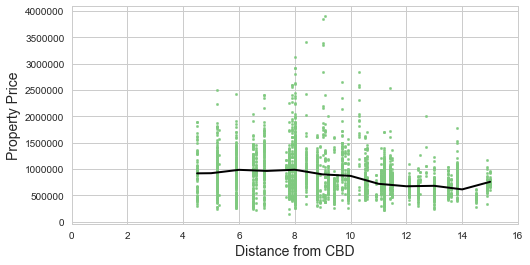

In [21]:
melHousingNorth = melHousing[melHousing['Region'] == 'North']
fig, ax = plt.subplots()
#Scatter Diagram
ax.scatter(melHousingNorth['Distance'], melHousingNorth['Price'], c = COLOR31, s = 6)

#Line-chart
tmpPropDF = _getMeanPriceSmooth(melHousingNorth, 'Distance')
ax.plot(tmpPropDF['Distance'], tmpPropDF['Price'], color='Black', linewidth=2.0, linestyle="-")

#Set the lower limit of the scale to Zero
ax.set_xlim(0,16)
ax.set_ylabel(r'Property Price', size = 14)
ax.set_xlabel(r'Distance from CBD', size = 14)
plt.show()

** Only South **

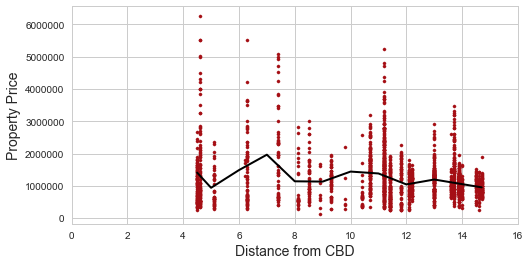

In [22]:
melHousingSouth = melHousing[melHousing['Region'] == 'South']
fig, ax = plt.subplots()
#Scatter Diagram
ax.scatter(melHousingSouth['Distance'], melHousingSouth['Price'], c = COLOR25, s = 10)

#Line-chart
tmpPropDF = _getMeanPriceSmooth(melHousingSouth, 'Distance')
ax.plot(tmpPropDF['Distance'], tmpPropDF['Price'], color='Black', linewidth=2.0, linestyle="-")

#Set the lower limit of the scale to Zero
ax.set_xlim(0,16)
ax.set_ylabel(r'Property Price', size = 14)
ax.set_xlabel(r'Distance from CBD', size = 14)
plt.show()

** Only East **

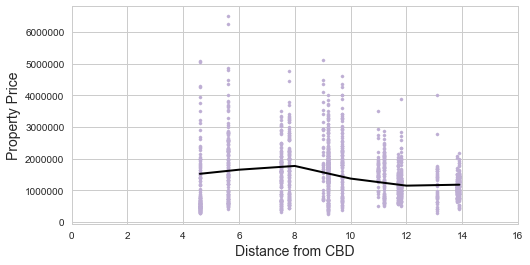

In [23]:
melHousingEast = melHousing[melHousing['Region'] == 'East']
fig, ax = plt.subplots()
#Scatter Diagram
ax.scatter(melHousingEast['Distance'], melHousingEast['Price'], c = COLOR32, s = 10)

# Line-chart
interval = 2
tmpPropDF = _getMeanPriceSmooth(melHousingEast, 'Distance', interval)
ax.plot(tmpPropDF['Distance'], tmpPropDF['Price'], color='Black', linewidth=2.0, linestyle="-")
#Set the lower limit of the scale to Zero
ax.set_xlim(0,16)
ax.set_ylabel(r'Property Price', size = 14)
ax.set_xlabel(r'Distance from CBD', size = 14)
plt.show()

** Only West **

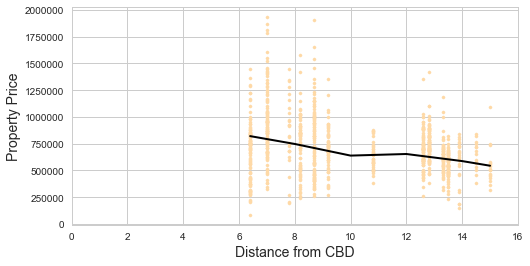

In [24]:
melHousingWest = melHousing[melHousing['Region'] == 'West']
fig, ax = plt.subplots()
#Scatter Diagram
ax.scatter(melHousingWest['Distance'], melHousingWest['Price'], c = COLOR40, s = 10)

#Line-chart
interval=2
tmpPropDF = _getMeanPriceSmooth(melHousingWest, 'Distance', interval)
ax.plot(tmpPropDF['Distance'], tmpPropDF['Price'], color='Black', linewidth=2.0, linestyle="-")

#Set the lower limit of the scale to Zero
ax.set_xlim(0,16)
ax.set_ylabel(r'Property Price', size = 14)
ax.set_xlabel(r'Distance from CBD', size = 14)
plt.show()

###### Scatterplot of 'Property Price' (Y) vs 'Number of Rooms' (X) ######

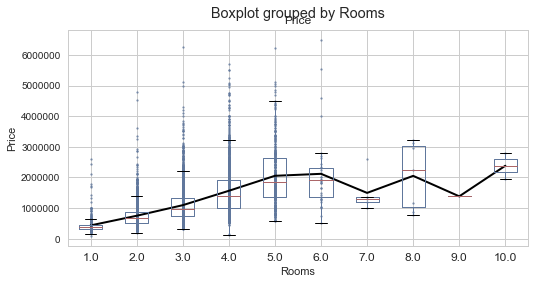

In [25]:
#Scatter Diagram
ax = sns.regplot(x=melHousing['Rooms'], y=melHousing['Price'], data=melHousing, scatter=True, fit_reg=False, scatter_kws={'s':5})

#Line-chart
tmpPropDF = _getMeanPriceSmooth(melHousing, 'Rooms')
ax.plot(tmpPropDF['Rooms'], tmpPropDF['Price'], color='Black', linewidth=2.0, linestyle="-")

#Box-plot
ax = melHousing.boxplot(column='Price', by='Rooms', ax=ax)

** Scatterplot of 'Property Price'(Y) vs 'Number of Rooms'(X) with 'Property Type' distribution. 
   Various Property Types are 
   h - house,cottage, villa, semi, terrace; 
   u - unit, duplex; 
   t - townhouse 
**

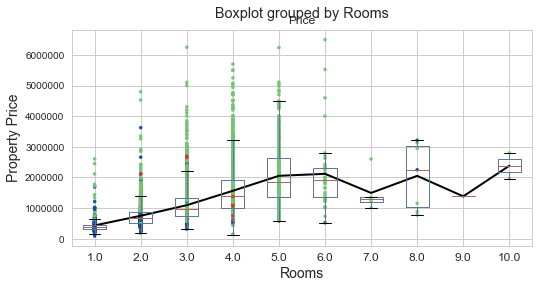

In [26]:
fig, ax = plt.subplots()
colors = {'h':COLOR13, 'u':COLOR20, 't':COLOR24}
#Scatter Diagram
ax.scatter(melHousing['Rooms'], melHousing['Price'], c=melHousing['Type'].apply(lambda x: colors[x]), s = 10)

#Line-chart
tmpPropDF = _getMeanPriceSmooth(melHousing, 'Rooms')
ax.plot(tmpPropDF['Rooms'], tmpPropDF['Price'], color='Black', linewidth=2.0, linestyle="-")

ax.set_ylabel(r'Property Price', size = 14)
ax.set_xlabel(r'Number of Rooms', size = 14)

#Box-plot
ax = melHousing.boxplot(column='Price', by='Rooms', ax=ax)
plt.show()

** Only Property Type - 'h' **

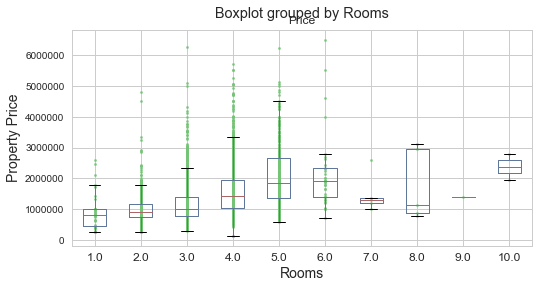

In [27]:
melHousingPropH = melHousing[melHousing['Type'] == 'h']
fig, ax = plt.subplots()
#Scatter Diagram
ax.scatter(melHousingPropH['Rooms'], melHousingPropH['Price'], c = COLOR13, s = 5)

#Line-chart
#tmpPropDF = _getMeanPriceSmooth(melHousingPropH, 'Rooms')
#ax.plot(tmpPropDF['Rooms'], tmpPropDF['Price'], color='Black', linewidth=2.0, linestyle="-")

#Set the lower limit of the scale to Zero
ax.set_xlim(0,12)
ax.set_ylabel(r'Property Price', size = 14)
ax.set_xlabel(r'Number of Rooms', size = 14)

#Box-plot
#fig = sns.boxplot(x=melHousingPropH['Rooms'], y=melHousingPropH['Price'], data=melHousingPropH, palette="Set2")
ax = melHousingPropH.boxplot(column='Price', by='Rooms', ax=ax)

plt.show()

** Only Property Type - 'u' **

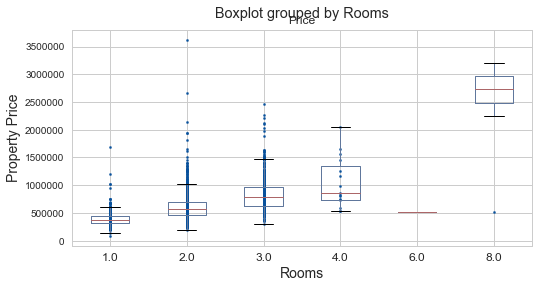

In [28]:
melHousingPropU = melHousing[melHousing['Type'] == 'u']
fig, ax = plt.subplots()
#Scatter Diagram
ax.scatter(melHousingPropU['Rooms'], melHousingPropU['Price'], c = COLOR20, s = 5)

#Line-chart
#interval=1
#tmpPropDF = _getMeanPriceSmooth(melHousingPropU, 'Rooms', interval)
#ax.plot(tmpPropDF['Rooms'], tmpPropDF['Price'], color='Black', linewidth=2.0, linestyle="-")

#Set the lower limit of the scale to Zero
ax.set_xlim(0,12)
ax.set_ylabel(r'Property Price', size = 14)
ax.set_xlabel(r'Number of Rooms', size = 14)

#Box-plot
ax = melHousingPropU.boxplot(column='Price', by='Rooms', ax=ax)

plt.show()

** Only Property Type - 't' **

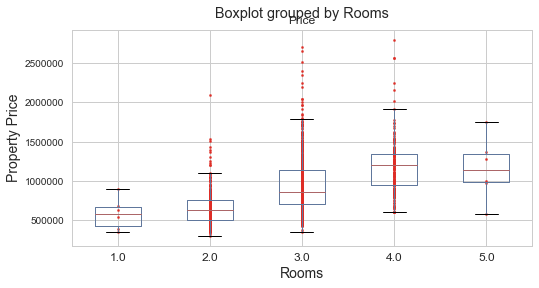

In [29]:
melHousingPropT = melHousing[melHousing['Type'] == 't']
fig, ax = plt.subplots()
#Scatter Diagram
ax.scatter(melHousingPropT['Rooms'], melHousingPropT['Price'], c = COLOR24, s = 5)

#Line-chart
#tmpPropDF = _getMeanPriceSmooth(melHousingPropT, 'Rooms')
#ax.plot(tmpPropDF['Rooms'], tmpPropDF['Price'], color='Black', linewidth=2.0, linestyle="-")

#Set the lower limit of the scale to Zero
ax.set_xlim(0,12)
ax.set_ylabel(r'Property Price', size = 14)
ax.set_xlabel(r'Number of Rooms', size = 14)

#Box-plot
ax = melHousingPropT.boxplot(column='Price', by='Rooms', ax=ax)

plt.show()

** Scatterplot of 'Property Price' (Y) vs 'Number of Cars fit into a Garage' (X) **

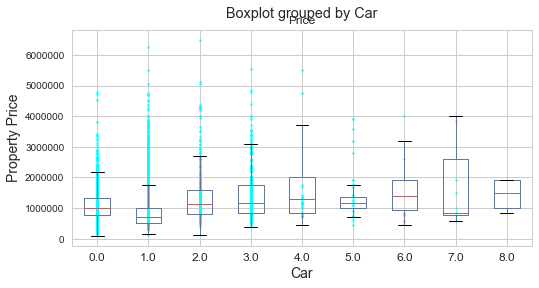

In [30]:
fig, ax = plt.subplots()
#Scatter Diagram
ax.scatter(melHousing['Car'], melHousing['Price'], c = 'Cyan', s = 4)

#Set the lower limit of the scale to Zero
ax.set_xlim(0,20)
ax.set_ylabel(r'Property Price', size = 14)
ax.set_xlabel(r'Number of Cars fit into a Garage', size = 14)

#Box-plot
ax = melHousing.boxplot(column='Price', by='Car', ax=ax)

#Line-chart
#tmpPropDF = _getMeanPriceSmooth(melHousing, 'Car')
#ax.plot(tmpPropDF['Car'], tmpPropDF['Price'], color='Black', linewidth=2.0, linestyle="-")

plt.show()

###### Scatterplot of 'Property Price' (Y) vs 'Property Sold Date' (X) ######

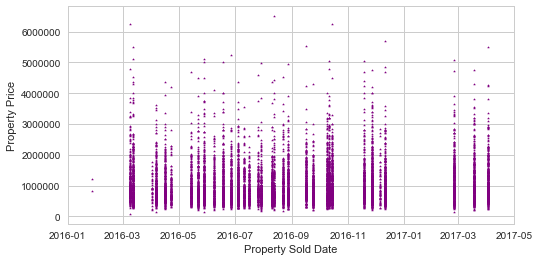

In [31]:
#days = mdates.DayLocator()
#ours = mdates.HourLocator()
#dfmt = mdates.DateFormatter('%b %d')
datemin = dt.datetime(2016, 1, 1)
datemax = dt.datetime(2017, 5, 1)
melHousingDate = melHousing.sort_values(['Date']) 

fig, ax = plt.subplots()
plt.plot_date(melHousingDate['Date'], melHousingDate['Price'], c='Purple', fmt='*', markersize=3)
#tmpPropDF = _getMeanPriceSmooth(melHousingDate, 'Date')
#ax.plot_date(tmpPropDF['Date'], tmpPropDF['Price'], color='Black', linewidth=3.0, linestyle="-")
plt.ylabel("Property Price")
plt.xlabel('Property Sold Date')
#plt.grid(True)
#ax.xaxis.set_major_locator(days)
#ax.xaxis.set_major_formatter(dfmt)
ax.set_xlim(datemin, datemax)

plt.show()

** From data distribution and visualization we can conclude that among the considered IV (Independent Variables) except 'Landsize' all others ('Property Type', 'Property Sold Date', 'Distance from CBD(Central Business District)', 'Suburb Region' and 'Number of Rooms'.) have influence over the 'Property Price'. **

#### Regression Analysis ####

*Now we will try to find potential relationship between each IV and and the DV using mathematical equations. In multiple regression, each coefficient is interpreted as the estimated change in DV corresponding to a unit change in a IV, when all other IVs are held constant.*

** Multicollinearity ** is also an important aspect. It happens when some/all IVs are correlated with each other. If we find high multicollinearity between 2 IVs both the variables can't be considered in the regression equation; they are redundant. One of them must go. 

** Function to capture meaningful OLS result for comparison **

In [32]:
def _capture_Result(modelName, lResult):
    coeff = ''
    for key, value in result.params.iteritems():
        coeff = coeff + str(key) + '|' + str(value) + '    '
        
    SE = ''
    for key, value in result.bse.iteritems():
        SE = SE + str(key) + '|' + str(value) + '    '
        
    tval = ''
    for key, value in result.tvalues.iteritems():
        tval = tval + str(key) + '|' + str(value) + '    '
        
    
    pval = ''
    for key, value in result.pvalues.iteritems():
        pval = pval + str(key) + '|' + str(value) + '    '
        
        
    resultRecord = {'RegressionModel': modelName, 'R-squared': str(lResult.rsquared), 'AdjR-squared': str(lResult.rsquared_adj), 
                    'F-stat': str(lResult.fvalue), 'Co-eff': coeff, 'SE': SE,
                    't': tval, 'P>|t|': pval, '95%ConfInt': lResult.conf_int().to_string()}

    return resultRecord

In [33]:
# Declaring Empty Dataframe to capture various Regression Result for Analysis
# Creating index for Dataframe
indx = np.arange(0)
columns = ['RegressionModel', 'R-squared', 'AdjR-squared', 'F-stat', 'Co-eff', 'SE', 't', 'P>|t|', '95%ConfInt']
analysisResult = pd.DataFrame(columns=columns, index = indx)
analysisResult

,RegressionModel,R-squared,AdjR-squared,F-stat,Co-eff,SE,t,P>|t|,95%ConfInt


###### Regression Analysis: Property Price(Y) vs Distance from CBD(X) ######

In [34]:
result = sm.ols(formula='Price ~ Distance', data=melHousing).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     52.00
Date:                Sat, 03 Jun 2017   Prob (F-statistic):           5.99e-13
Time:                        19:41:27   Log-Likelihood:            -1.3961e+05
No. Observations:                9421   AIC:                         2.792e+05
Df Residuals:                    9419   BIC:                         2.792e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1.192e+06   1.79e+04     66.781      0.000      1.16e+06  1.23e+06
Distance   -1.362e+04   1889.071     -7.211      0.000     -1.73e+04 -9918.985
==============================================================================
Omnibus:                     4198.861   Durbin-Watson:                   1.461
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25358.090
Skew:                           2.068   Prob(JB):                         0.00
Kurtosis:                       9.891   Cond. No.                         25.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Interpreting coefficients

    With very small p-value, basically zero, we can interpret that the coefficient (13621.97) of *Distance from CBD* as, if hypothetically a property moves 1 KM further from CBD the property price will decrease on an average by **AUD13622.00**. It means if we compare 2 properties which are exactly same as far as Number of Rooms, Sold Date, Region and Property Type except the difference of 'Distance from CBD' by 1 KM, the price of the farther house will decrease by AUD13,622.00.  The confidence interval gives us a range of plausible values for this difference, about *(AUD9,919.00, AUD17,325)*, definitely not massive deviation. 

** Capturing Result in tabular format **

In [35]:
# Capturing OLS Result in tabular format 
modelName = 'Property Price(Y) ~ Distance from CBD(X)'
analysisResult = analysisResult.append(_capture_Result(modelName, result), ignore_index=True)
analysisResult

,RegressionModel,R-squared,AdjR-squared,F-stat,Co-eff,SE,t,P>|t|,95%ConfInt
0,Property Price(Y) ~ Distance from CBD(X),0.00549019208666,0.00538460658842,51.9975960547,Intercept|1192480.65225 Distance|-13621.972...,Intercept|17856.5054294 Distance|1889.07142...,Intercept|66.7813003481 Distance|-7.2109358...,Intercept|0.0 Distance|5.98504272152e-13,0 1\nInterce...


###### Regression Analysis: Property Price(Y) vs Property Sold Date(X) ######

In [36]:
melHousing['gDate'] = pd.to_datetime(melHousing['Date']).apply(lambda x: x.toordinal())
result = sm.ols(formula='Price ~ gDate', data=melHousing).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     10.49
Date:                Sat, 03 Jun 2017   Prob (F-statistic):            0.00121
Time:                        19:41:29   Log-Likelihood:            -1.3963e+05
No. Observations:                9421   AIC:                         2.793e+05
Df Residuals:                    9419   BIC:                         2.793e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -1.334e+08   4.15e+07     -3.212      0.001     -2.15e+08  -5.2e+07
gDate        182.6090     56.394      3.238      0.001        72.066   293.153
==============================================================================
Omnibus:                     4276.183   Durbin-Watson:                   1.453
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26482.440
Skew:                           2.104   Prob(JB):                         0.00
Kurtosis:                      10.053   Cond. No.                     4.49e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.49e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
# Capturing OLS Result in tabular format 
modelName = 'Property Price(Y) ~ Property Sold Date(X)'
analysisResult = analysisResult.append(_capture_Result(modelName, result), ignore_index=True)
analysisResult

,RegressionModel,R-squared,AdjR-squared,F-stat,Co-eff,SE,t,P>|t|,95%ConfInt
0,Property Price(Y) ~ Distance from CBD(X),0.00549019208666,0.00538460658842,51.9975960547,Intercept|1192480.65225 Distance|-13621.972...,Intercept|17856.5054294 Distance|1889.07142...,Intercept|66.7813003481 Distance|-7.2109358...,Intercept|0.0 Distance|5.98504272152e-13,0 1\nInterce...
1,Property Price(Y) ~ Property Sold Date(X),0.00111198254599,0.00100593222032,10.4854232082,Intercept|-133365691.267 gDate|182.60902901...,Intercept|41517639.23 gDate|56.3935280222,Intercept|-3.21226576802 gDate|3.2381203202...,Intercept|0.00132135318412 gDate|0.00120736...,0 1\nInterce...


###### Regression Analysis: Property Price(Y) vs Number of Rooms(X) ######

In [38]:
result = sm.ols(formula='Price ~ Rooms', data=melHousing).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     4328.
Date:                Sat, 03 Jun 2017   Prob (F-statistic):               0.00
Time:                        19:41:29   Log-Likelihood:            -1.3785e+05
No. Observations:                9421   AIC:                         2.757e+05
Df Residuals:                    9419   BIC:                         2.757e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -2.577e+04   1.76e+04     -1.461      0.144     -6.03e+04  8802.839
Rooms       3.852e+05   5855.340     65.787      0.000      3.74e+05  3.97e+05
==============================================================================
Omnibus:                     4368.343   Durbin-Watson:                   1.253
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36602.131
Skew:                           2.039   Prob(JB):                         0.00
Kurtosis:                      11.753   Cond. No.                         10.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
# Capturing OLS Result in tabular format 
modelName = 'Property Price(Y) ~ Number of Rooms(X)'
analysisResult = analysisResult.append(_capture_Result(modelName, result), ignore_index=True)
analysisResult

,RegressionModel,R-squared,AdjR-squared,F-stat,Co-eff,SE,t,P>|t|,95%ConfInt
0,Property Price(Y) ~ Distance from CBD(X),0.00549019208666,0.00538460658842,51.9975960547,Intercept|1192480.65225 Distance|-13621.972...,Intercept|17856.5054294 Distance|1889.07142...,Intercept|66.7813003481 Distance|-7.2109358...,Intercept|0.0 Distance|5.98504272152e-13,0 1\nInterce...
1,Property Price(Y) ~ Property Sold Date(X),0.00111198254599,0.00100593222032,10.4854232082,Intercept|-133365691.267 gDate|182.60902901...,Intercept|41517639.23 gDate|56.3935280222,Intercept|-3.21226576802 gDate|3.2381203202...,Intercept|0.00132135318412 gDate|0.00120736...,0 1\nInterce...
2,Property Price(Y) ~ Number of Rooms(X),0.31482672889,0.314753985152,4327.88768105,Intercept|-25766.9380707 Rooms|385203.39290...,Intercept|17635.6990117 Rooms|5855.33993222...,Intercept|-1.46106701263 Rooms|65.786683158...,Intercept|0.14403040883 Rooms|0.0,0 1\nInter...


###### Regression Analysis: Property Price(Y) vs Number of Rooms(X) ######

In [40]:
result = sm.ols(formula='Price ~ Car', data=melHousing).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     704.7
Date:                Sat, 03 Jun 2017   Prob (F-statistic):          1.97e-148
Time:                        19:41:29   Log-Likelihood:            -1.0988e+05
No. Observations:                7443   AIC:                         2.198e+05
Df Residuals:                    7441   BIC:                         2.198e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   7.627e+05    1.4e+04     54.455      0.000      7.35e+05   7.9e+05
Car         2.087e+05   7860.160     26.546      0.000      1.93e+05  2.24e+05
==============================================================================
Omnibus:                     2969.854   Durbin-Watson:                   1.428
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15643.014
Skew:                           1.860   Prob(JB):                         0.00
Kurtosis:                       9.050   Cond. No.                         4.30
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
# Capturing OLS Result in tabular format 
modelName = 'Property Price(Y) ~ Number of Cars fir into the Garage(X)'
analysisResult = analysisResult.append(_capture_Result(modelName, result), ignore_index=True)
analysisResult

,RegressionModel,R-squared,AdjR-squared,F-stat,Co-eff,SE,t,P>|t|,95%ConfInt
0,Property Price(Y) ~ Distance from CBD(X),0.00549019208666,0.00538460658842,51.9975960547,Intercept|1192480.65225 Distance|-13621.972...,Intercept|17856.5054294 Distance|1889.07142...,Intercept|66.7813003481 Distance|-7.2109358...,Intercept|0.0 Distance|5.98504272152e-13,0 1\nInterce...
1,Property Price(Y) ~ Property Sold Date(X),0.00111198254599,0.00100593222032,10.4854232082,Intercept|-133365691.267 gDate|182.60902901...,Intercept|41517639.23 gDate|56.3935280222,Intercept|-3.21226576802 gDate|3.2381203202...,Intercept|0.00132135318412 gDate|0.00120736...,0 1\nInterce...
2,Property Price(Y) ~ Number of Rooms(X),0.31482672889,0.314753985152,4327.88768105,Intercept|-25766.9380707 Rooms|385203.39290...,Intercept|17635.6990117 Rooms|5855.33993222...,Intercept|-1.46106701263 Rooms|65.786683158...,Intercept|0.14403040883 Rooms|0.0,0 1\nInter...
3,Property Price(Y) ~ Number of Cars fir into th...,0.0865104698585,0.0863877055082,704.687229548,Intercept|762740.537267 Car|208655.367009,Intercept|14006.6782749 Car|7860.15950963,Intercept|54.4554906093 Car|26.545945633,Intercept|0.0 Car|1.97064756011e-148,0 1\nInter...


##### Checking of Multicollinearity #####

###### Scatterplot of 'Distance from CBD' (Y) vs 'Number of Rooms' (X) ######

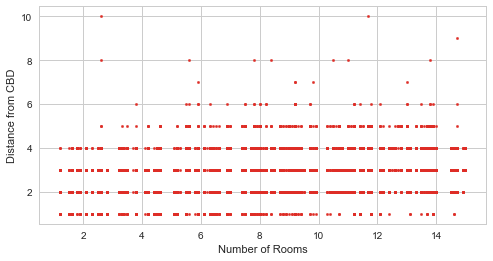

In [42]:
fig, ax = plt.subplots()
ax.scatter(melHousing['Distance'], melHousing['Rooms'], c=COLOR24, s = 6)
ax.set_ylabel(r'Distance from CBD')
ax.set_xlabel(r'Number of Rooms')
plt.show()

###### Scatterplot of 'Distance from CBD' (Y) vs 'Property Sold Date' (X) ######

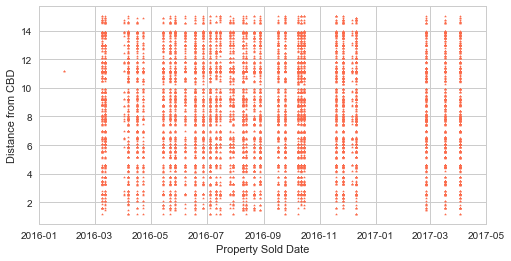

In [43]:
datemin = dt.datetime(2016, 1, 1)
datemax = dt.datetime(2017, 5, 1)
melHousingDate = melHousing.sort_values(['Date']) 

fig, ax = plt.subplots()
plt.plot_date(melHousingDate['Date'], melHousingDate['Distance'], c=COLOR23, fmt='*', markersize=3)
plt.ylabel("Distance from CBD")
plt.xlabel("Property Sold Date")
ax.set_xlim(datemin, datemax)

plt.show()

###### Scatterplot of 'Distance from CBD' (Y) vs 'Number of Cars fit into the Garage' (X)######

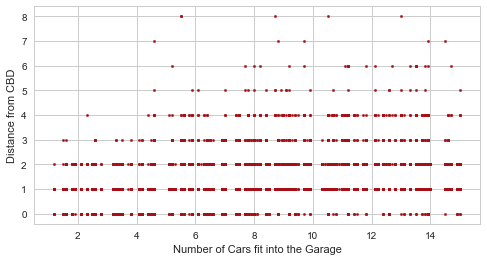

In [44]:
fig, ax = plt.subplots()
ax.scatter(melHousing['Distance'], melHousing['Car'], c=COLOR25, s = 6)
ax.set_ylabel(r'Distance from CBD')
ax.set_xlabel(r'Number of Cars fit into the Garage')
plt.show()

###### Scatterplot of 'Number of Rooms' (Y) vs 'Property Sold Date' (X) ######

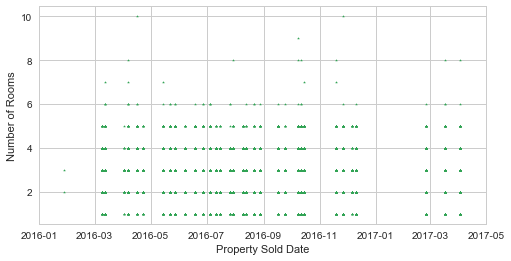

In [45]:
datemin = dt.datetime(2016, 1, 1)
datemax = dt.datetime(2017, 5, 1)
melHousingDate = melHousing.sort_values(['Date']) 

fig, ax = plt.subplots()
plt.plot_date(melHousingDate['Date'], melHousingDate['Rooms'], c=COLOR14, fmt='*', markersize=3)
plt.ylabel("Number of Rooms")
plt.xlabel("Property Sold Date")
ax.set_xlim(datemin, datemax)

plt.show()

###### Scatterplot of 'Number of Rooms' (Y) vs 'Number of Cars fit into the Garage' (X) ######

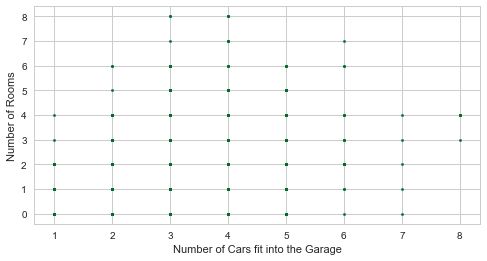

In [46]:
fig, ax = plt.subplots()
ax.scatter(melHousing['Rooms'], melHousing['Car'], c=COLOR15, s = 6)
ax.set_ylabel(r'Number of Rooms')
ax.set_xlabel(r'Number of Cars fit into the Garage')
plt.show()

###### Scatterplot of 'Number of Rooms' (Y) vs 'Property Sold Date' (X) ######

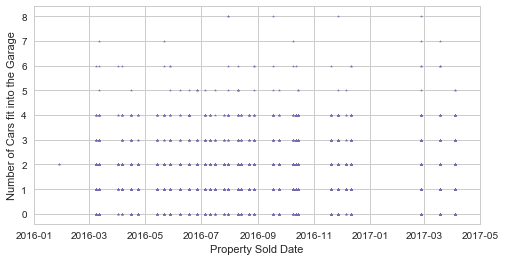

In [47]:
datemin = dt.datetime(2016, 1, 1)
datemax = dt.datetime(2017, 5, 1)
melHousingDate = melHousing.sort_values(['Date']) 

fig, ax = plt.subplots()
plt.plot_date(melHousingDate['Date'], melHousingDate['Car'], c=COLOR29, fmt='*', markersize=3)
plt.ylabel("Number of Cars fit into the Garage")
plt.xlabel("Property Sold Date")
ax.set_xlim(datemin, datemax)

plt.show()

In [48]:
melHousing.corr()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,gDate
Rooms,1.000000,0.561094,0.299916,-0.005767,0.904635,0.581770,0.405438,0.086899,0.374623,-0.136219,0.028940,0.078499,-0.011493
Price,0.561094,1.000000,-0.074096,0.278212,0.532092,0.515945,0.294127,0.072138,0.347656,-0.316718,-0.243360,0.262087,0.033346
Distance,0.299916,-0.074096,1.000000,0.088545,0.286365,0.098107,0.295145,0.075429,0.103062,0.207871,-0.059246,0.149651,-0.006659
Postcode,-0.005767,0.278212,0.088545,1.000000,-0.022517,0.099888,-0.016645,-0.004141,0.044772,-0.042857,-0.712902,0.634826,-0.005543
Bedroom2,0.904635,0.532092,0.286365,-0.022517,1.000000,0.567363,0.397088,0.078244,0.364009,-0.120155,0.030167,0.077824,0.007131
Bathroom,0.581770,0.515945,0.098107,0.099888,0.567363,1.000000,0.328791,0.050417,0.321728,0.116783,-0.095689,0.131239,-0.012447
Car,0.405438,0.294127,0.295145,-0.016645,0.397088,0.328791,1.000000,0.095998,0.206771,0.094311,0.010614,0.048705,0.016554
Landsize,0.086899,0.072138,0.075429,-0.004141,0.078244,0.050417,0.095998,1.000000,0.133821,0.019813,0.021744,0.024392,0.025762
BuildingArea,0.374623,0.347656,0.103062,0.044772,0.364009,0.321728,0.206771,0.133821,1.000000,-0.024552,-0.033433,0.095864,0.016330
YearBuilt,-0.136219,-0.316718,0.207871,-0.042857,-0.120155,0.116783,0.094311,0.019813,-0.024552,1.000000,0.038388,0.004890,0.031205


** From data distribution and visualization we can conslude that among the considered IV (Independent Variables) **
1. 'Number of Rooms' doesn't appear highly correlated with 'Distance from CBD' 
2. 'Number of Rooms' doesn't appear highly correlated with 'Property Sold Date' 
3. 'Distance from CBD' doesn't appear highly correlated with 'Property Sold Date' 

*It's a good News that there is 'No' multicollinearity between the IVs mentioned above.*

Other IV ('Property Type' and 'Region') are the **Dummy variables**. Would be considered in later part of detailed calculation.

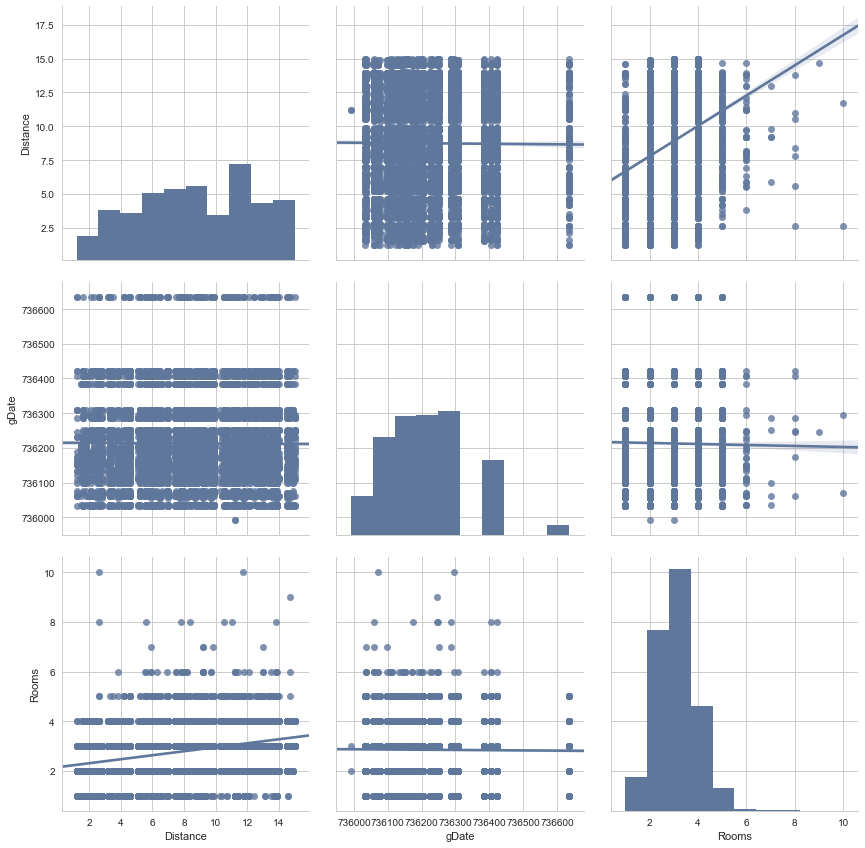

In [49]:
sns.pairplot(melHousing, vars=['Distance', 'gDate', 'Rooms'], kind='reg', size=4) 

###### Regression Analysis: Property Price(Y) vs Distance from CBD(X1) + Property Sold Date(X2) + Number of Rooms(X3) ######

In [50]:
# Performing Ordinary Least Square (OLS) regression on the Property Price as the function of 
#'Distance from CBD' + 'Property Sold Date' + 'Number of Rooms'

result = sm.ols(formula='Price ~ Distance + Rooms + gDate', data=melHousing).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     1931.
Date:                Sat, 03 Jun 2017   Prob (F-statistic):               0.00
Time:                        19:41:42   Log-Likelihood:            -1.3737e+05
No. Observations:                9421   AIC:                         2.748e+05
Df Residuals:                    9417   BIC:                         2.748e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -1.568e+08   3.27e+07     -4.795      0.000     -2.21e+08 -9.27e+07
Distance   -4.894e+04   1562.577    -31.319      0.000      -5.2e+04 -4.59e+04
Rooms       4.403e+05   5835.371     75.457      0.000      4.29e+05  4.52e+05
gDate        213.2694     44.405      4.803      0.000       126.226   300.312
==============================================================================
Omnibus:                     4315.245   Durbin-Watson:                   1.385
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37275.918
Skew:                           1.997   Prob(JB):                         0.00
Kurtosis:                      11.889   Cond. No.                     4.49e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.49e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
# Capturing OLS Result in tabular format 
modelName = 'Property Price(Y) ~ Distance from CBD(X1) + Property Sold Date(X2) + Number of Rooms(X3)'
analysisResult = analysisResult.append(_capture_Result(modelName, result), ignore_index=True)
analysisResult

,RegressionModel,R-squared,AdjR-squared,F-stat,Co-eff,SE,t,P>|t|,95%ConfInt
0,Property Price(Y) ~ Distance from CBD(X),0.00549019208666,0.00538460658842,51.9975960547,Intercept|1192480.65225 Distance|-13621.972...,Intercept|17856.5054294 Distance|1889.07142...,Intercept|66.7813003481 Distance|-7.2109358...,Intercept|0.0 Distance|5.98504272152e-13,0 1\nInterce...
1,Property Price(Y) ~ Property Sold Date(X),0.00111198254599,0.00100593222032,10.4854232082,Intercept|-133365691.267 gDate|182.60902901...,Intercept|41517639.23 gDate|56.3935280222,Intercept|-3.21226576802 gDate|3.2381203202...,Intercept|0.00132135318412 gDate|0.00120736...,0 1\nInterce...
2,Property Price(Y) ~ Number of Rooms(X),0.31482672889,0.314753985152,4327.88768105,Intercept|-25766.9380707 Rooms|385203.39290...,Intercept|17635.6990117 Rooms|5855.33993222...,Intercept|-1.46106701263 Rooms|65.786683158...,Intercept|0.14403040883 Rooms|0.0,0 1\nInter...
3,Property Price(Y) ~ Number of Cars fir into th...,0.0865104698585,0.0863877055082,704.687229548,Intercept|762740.537267 Car|208655.367009,Intercept|14006.6782749 Car|7860.15950963,Intercept|54.4554906093 Car|26.545945633,Intercept|0.0 Car|1.97064756011e-148,0 1\nInter...
4,Property Price(Y) ~ Distance from CBD(X1) + Pr...,0.380896452147,0.3806992226,1931.23422962,Intercept|-156766972.867 Distance|-48938.23...,Intercept|32691589.4042 Distance|1562.57682...,Intercept|-4.79533041138 Distance|-31.31892...,Intercept|1.64896819259e-06 Distance|6.4696...,0 1\nInterce...


*From the above OLS result analysis we can conclude that the Independent variable 'Property Sold Date' is grossly impacting the R-squared value; degrading the overall R-squared value severely. Moreover, with huge negative intercept value (-116988589.47) the 4th model practically becomes meaningless.*
** Hence it has been decided to not to consider 'Property Sold Date' as IV in the regression analysis. **

###### Regression Analysis: Property Price(Y) vs Distance from CBD(X1) + Number of Rooms(X2) ######

In [52]:
# Performing Ordinary Least Square (OLS) regression on the Property Price as the function of 
#'Distance from CBD' + 'Number of Rooms'
result = sm.ols(formula='Price ~ Distance + Rooms', data=melHousing).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     2879.
Date:                Sat, 03 Jun 2017   Prob (F-statistic):               0.00
Time:                        19:41:43   Log-Likelihood:            -1.3739e+05
No. Observations:                9421   AIC:                         2.748e+05
Df Residuals:                    9418   BIC:                         2.748e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   2.457e+05   1.89e+04     13.005      0.000      2.09e+05  2.83e+05
Distance   -4.896e+04   1564.398    -31.299      0.000      -5.2e+04 -4.59e+04
Rooms         4.4e+05   5841.914     75.325      0.000      4.29e+05  4.51e+05
==============================================================================
Omnibus:                     4298.578   Durbin-Watson:                   1.384
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36804.391
Skew:                           1.990   Prob(JB):                         0.00
Kurtosis:                      11.827   Cond. No.                         35.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
# Capturing OLS Result in tabular format 
modelName = 'Property Price(Y) ~ Distance from CBD(X1) + Number of Rooms(X2)'
analysisResult = analysisResult.append(_capture_Result(modelName, result), ignore_index=True)
analysisResult

,RegressionModel,R-squared,AdjR-squared,F-stat,Co-eff,SE,t,P>|t|,95%ConfInt
0,Property Price(Y) ~ Distance from CBD(X),0.00549019208666,0.00538460658842,51.9975960547,Intercept|1192480.65225 Distance|-13621.972...,Intercept|17856.5054294 Distance|1889.07142...,Intercept|66.7813003481 Distance|-7.2109358...,Intercept|0.0 Distance|5.98504272152e-13,0 1\nInterce...
1,Property Price(Y) ~ Property Sold Date(X),0.00111198254599,0.00100593222032,10.4854232082,Intercept|-133365691.267 gDate|182.60902901...,Intercept|41517639.23 gDate|56.3935280222,Intercept|-3.21226576802 gDate|3.2381203202...,Intercept|0.00132135318412 gDate|0.00120736...,0 1\nInterce...
2,Property Price(Y) ~ Number of Rooms(X),0.31482672889,0.314753985152,4327.88768105,Intercept|-25766.9380707 Rooms|385203.39290...,Intercept|17635.6990117 Rooms|5855.33993222...,Intercept|-1.46106701263 Rooms|65.786683158...,Intercept|0.14403040883 Rooms|0.0,0 1\nInter...
3,Property Price(Y) ~ Number of Cars fir into th...,0.0865104698585,0.0863877055082,704.687229548,Intercept|762740.537267 Car|208655.367009,Intercept|14006.6782749 Car|7860.15950963,Intercept|54.4554906093 Car|26.545945633,Intercept|0.0 Car|1.97064756011e-148,0 1\nInter...
4,Property Price(Y) ~ Distance from CBD(X1) + Pr...,0.380896452147,0.3806992226,1931.23422962,Intercept|-156766972.867 Distance|-48938.23...,Intercept|32691589.4042 Distance|1562.57682...,Intercept|-4.79533041138 Distance|-31.31892...,Intercept|1.64896819259e-06 Distance|6.4696...,0 1\nInterce...
5,Property Price(Y) ~ Distance from CBD(X1) + Nu...,0.379379931597,0.379248137146,2878.57288032,Intercept|245716.370303 Distance|-48963.499...,Intercept|18893.9974162 Distance|1564.39752...,Intercept|13.0049965018 Distance|-31.298630...,Intercept|2.44864196505e-38 Distance|1.1483...,0 1\nInter...


###### Regression Analysis: Property Price(Y) vs Distance from CBD(X1) + Number of Cars fit into the Garage(X2) ######

In [54]:
# Performing Ordinary Least Square (OLS) regression on the Property Price as the function of 
#'Distance from CBD' + 'Number of Cars fit into the Garage'
result = sm.ols(formula='Price ~ Distance + Car', data=melHousing).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     471.1
Date:                Sat, 03 Jun 2017   Prob (F-statistic):          2.21e-193
Time:                        19:41:43   Log-Likelihood:            -1.0977e+05
No. Observations:                7443   AIC:                         2.196e+05
Df Residuals:                    7440   BIC:                         2.196e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   9.708e+05   1.98e+04     49.155      0.000      9.32e+05  1.01e+06
Distance   -3.063e+04   2078.712    -14.735      0.000     -3.47e+04 -2.66e+04
Car         2.439e+05   8109.706     30.078      0.000      2.28e+05   2.6e+05
==============================================================================
Omnibus:                     2834.120   Durbin-Watson:                   1.468
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14266.003
Skew:                           1.778   Prob(JB):                         0.00
Kurtosis:                       8.775   Cond. No.                         26.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
# Capturing OLS Result in tabular format 
modelName = 'Property Price(Y) ~ Distance from CBD(X1) + Number of Cars fit into the Garage(X2)'
analysisResult = analysisResult.append(_capture_Result(modelName, result), ignore_index=True)
analysisResult

,RegressionModel,R-squared,AdjR-squared,F-stat,Co-eff,SE,t,P>|t|,95%ConfInt
0,Property Price(Y) ~ Distance from CBD(X),0.00549019208666,0.00538460658842,51.9975960547,Intercept|1192480.65225 Distance|-13621.972...,Intercept|17856.5054294 Distance|1889.07142...,Intercept|66.7813003481 Distance|-7.2109358...,Intercept|0.0 Distance|5.98504272152e-13,0 1\nInterce...
1,Property Price(Y) ~ Property Sold Date(X),0.00111198254599,0.00100593222032,10.4854232082,Intercept|-133365691.267 gDate|182.60902901...,Intercept|41517639.23 gDate|56.3935280222,Intercept|-3.21226576802 gDate|3.2381203202...,Intercept|0.00132135318412 gDate|0.00120736...,0 1\nInterce...
2,Property Price(Y) ~ Number of Rooms(X),0.31482672889,0.314753985152,4327.88768105,Intercept|-25766.9380707 Rooms|385203.39290...,Intercept|17635.6990117 Rooms|5855.33993222...,Intercept|-1.46106701263 Rooms|65.786683158...,Intercept|0.14403040883 Rooms|0.0,0 1\nInter...
3,Property Price(Y) ~ Number of Cars fir into th...,0.0865104698585,0.0863877055082,704.687229548,Intercept|762740.537267 Car|208655.367009,Intercept|14006.6782749 Car|7860.15950963,Intercept|54.4554906093 Car|26.545945633,Intercept|0.0 Car|1.97064756011e-148,0 1\nInter...
4,Property Price(Y) ~ Distance from CBD(X1) + Pr...,0.380896452147,0.3806992226,1931.23422962,Intercept|-156766972.867 Distance|-48938.23...,Intercept|32691589.4042 Distance|1562.57682...,Intercept|-4.79533041138 Distance|-31.31892...,Intercept|1.64896819259e-06 Distance|6.4696...,0 1\nInterce...
5,Property Price(Y) ~ Distance from CBD(X1) + Nu...,0.379379931597,0.379248137146,2878.57288032,Intercept|245716.370303 Distance|-48963.499...,Intercept|18893.9974162 Distance|1564.39752...,Intercept|13.0049965018 Distance|-31.298630...,Intercept|2.44864196505e-38 Distance|1.1483...,0 1\nInter...
6,Property Price(Y) ~ Distance from CBD(X1) + Nu...,0.112413131568,0.112174532948,471.139067406,Intercept|970831.137884 Distance|-30630.037...,Intercept|19750.5264383 Distance|2078.71185...,Intercept|49.1546967579 Distance|-14.735104...,Intercept|0.0 Distance|1.84067050338e-48 ...,0 1\nInterc...


###### Regression Analysis: Property Price(Y) vs Number of Rooms(X1) + Number of Cars fit into the Garage(X2) ######

In [56]:
# Performing Ordinary Least Square (OLS) regression on the Property Price as the function of 
#'Number of Rooms' + 'Number of Cars fit into the Garage'
result = sm.ols(formula='Price ~ Rooms + Car', data=melHousing).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     1802.
Date:                Sat, 03 Jun 2017   Prob (F-statistic):               0.00
Time:                        19:41:43   Log-Likelihood:            -1.0875e+05
No. Observations:                7443   AIC:                         2.175e+05
Df Residuals:                    7440   BIC:                         2.175e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -4.045e+04   1.97e+04     -2.053      0.040     -7.91e+04 -1819.940
Rooms       3.658e+05   7109.357     51.458      0.000      3.52e+05   3.8e+05
Car         5.458e+04   7384.833      7.391      0.000      4.01e+04  6.91e+04
==============================================================================
Omnibus:                     3189.550   Durbin-Watson:                   1.237
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24411.208
Skew:                           1.877   Prob(JB):                         0.00
Kurtosis:                      11.039   Cond. No.                         11.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
# Capturing OLS Result in tabular format 
modelName = 'Property Price(Y) ~ Number of Rooms(X1) + Number of Cars fit into the Garage(X2)'
analysisResult = analysisResult.append(_capture_Result(modelName, result), ignore_index=True)
analysisResult

,RegressionModel,R-squared,AdjR-squared,F-stat,Co-eff,SE,t,P>|t|,95%ConfInt
0,Property Price(Y) ~ Distance from CBD(X),0.00549019208666,0.00538460658842,51.9975960547,Intercept|1192480.65225 Distance|-13621.972...,Intercept|17856.5054294 Distance|1889.07142...,Intercept|66.7813003481 Distance|-7.2109358...,Intercept|0.0 Distance|5.98504272152e-13,0 1\nInterce...
1,Property Price(Y) ~ Property Sold Date(X),0.00111198254599,0.00100593222032,10.4854232082,Intercept|-133365691.267 gDate|182.60902901...,Intercept|41517639.23 gDate|56.3935280222,Intercept|-3.21226576802 gDate|3.2381203202...,Intercept|0.00132135318412 gDate|0.00120736...,0 1\nInterce...
2,Property Price(Y) ~ Number of Rooms(X),0.31482672889,0.314753985152,4327.88768105,Intercept|-25766.9380707 Rooms|385203.39290...,Intercept|17635.6990117 Rooms|5855.33993222...,Intercept|-1.46106701263 Rooms|65.786683158...,Intercept|0.14403040883 Rooms|0.0,0 1\nInter...
3,Property Price(Y) ~ Number of Cars fir into th...,0.0865104698585,0.0863877055082,704.687229548,Intercept|762740.537267 Car|208655.367009,Intercept|14006.6782749 Car|7860.15950963,Intercept|54.4554906093 Car|26.545945633,Intercept|0.0 Car|1.97064756011e-148,0 1\nInter...
4,Property Price(Y) ~ Distance from CBD(X1) + Pr...,0.380896452147,0.3806992226,1931.23422962,Intercept|-156766972.867 Distance|-48938.23...,Intercept|32691589.4042 Distance|1562.57682...,Intercept|-4.79533041138 Distance|-31.31892...,Intercept|1.64896819259e-06 Distance|6.4696...,0 1\nInterce...
5,Property Price(Y) ~ Distance from CBD(X1) + Nu...,0.379379931597,0.379248137146,2878.57288032,Intercept|245716.370303 Distance|-48963.499...,Intercept|18893.9974162 Distance|1564.39752...,Intercept|13.0049965018 Distance|-31.298630...,Intercept|2.44864196505e-38 Distance|1.1483...,0 1\nInter...
6,Property Price(Y) ~ Distance from CBD(X1) + Nu...,0.112413131568,0.112174532948,471.139067406,Intercept|970831.137884 Distance|-30630.037...,Intercept|19750.5264383 Distance|2078.71185...,Intercept|49.1546967579 Distance|-14.735104...,Intercept|0.0 Distance|1.84067050338e-48 ...,0 1\nInterc...
7,Property Price(Y) ~ Number of Rooms(X1) + Numb...,0.326290780801,0.326109676172,1801.67002319,Intercept|-40449.7136074 Rooms|365836.75306...,Intercept|19706.2240554 Rooms|7109.35746929...,Intercept|-2.05263644084 Rooms|51.458483364...,Intercept|0.0401427532359 Rooms|0.0 Car|...,0 1\nInter...


###### Regression Analysis: Property Price(Y) vs Number of Rooms(X1) + Number of Cars fit into the Garage(X2) + Distance from CBD(X3) ######

In [58]:
# Performing Ordinary Least Square (OLS) regression on the Property Price as the function of 
#'Number of Rooms' + 'Number of Cars fit into the Garage + 'Distance from CBD'
result = sm.ols(formula='Price ~ Rooms + Car + Distance', data=melHousing).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     1620.
Date:                Sat, 03 Jun 2017   Prob (F-statistic):               0.00
Time:                        19:41:43   Log-Likelihood:            -1.0835e+05
No. Observations:                7443   AIC:                         2.167e+05
Df Residuals:                    7439   BIC:                         2.167e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   2.192e+05   2.07e+04     10.593      0.000      1.79e+05   2.6e+05
Rooms       4.052e+05   6870.981     58.971      0.000      3.92e+05  4.19e+05
Car         9.667e+04   7145.518     13.528      0.000      8.27e+04  1.11e+05
Distance   -5.094e+04   1750.304    -29.104      0.000     -5.44e+04 -4.75e+04
==============================================================================
Omnibus:                     3097.687   Durbin-Watson:                   1.367
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24038.051
Skew:                           1.806   Prob(JB):                         0.00
Kurtosis:                      11.029   Cond. No.                         35.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
# Capturing OLS Result in tabular format 
modelName = 'Property Price(Y) ~ Number of Rooms(X1) + Number of Cars fit into the Garage(X2) + Distance from CBD(X3)'
analysisResult = analysisResult.append(_capture_Result(modelName, result), ignore_index=True)
analysisResult

,RegressionModel,R-squared,AdjR-squared,F-stat,Co-eff,SE,t,P>|t|,95%ConfInt
0,Property Price(Y) ~ Distance from CBD(X),0.00549019208666,0.00538460658842,51.9975960547,Intercept|1192480.65225 Distance|-13621.972...,Intercept|17856.5054294 Distance|1889.07142...,Intercept|66.7813003481 Distance|-7.2109358...,Intercept|0.0 Distance|5.98504272152e-13,0 1\nInterce...
1,Property Price(Y) ~ Property Sold Date(X),0.00111198254599,0.00100593222032,10.4854232082,Intercept|-133365691.267 gDate|182.60902901...,Intercept|41517639.23 gDate|56.3935280222,Intercept|-3.21226576802 gDate|3.2381203202...,Intercept|0.00132135318412 gDate|0.00120736...,0 1\nInterce...
2,Property Price(Y) ~ Number of Rooms(X),0.31482672889,0.314753985152,4327.88768105,Intercept|-25766.9380707 Rooms|385203.39290...,Intercept|17635.6990117 Rooms|5855.33993222...,Intercept|-1.46106701263 Rooms|65.786683158...,Intercept|0.14403040883 Rooms|0.0,0 1\nInter...
3,Property Price(Y) ~ Number of Cars fir into th...,0.0865104698585,0.0863877055082,704.687229548,Intercept|762740.537267 Car|208655.367009,Intercept|14006.6782749 Car|7860.15950963,Intercept|54.4554906093 Car|26.545945633,Intercept|0.0 Car|1.97064756011e-148,0 1\nInter...
4,Property Price(Y) ~ Distance from CBD(X1) + Pr...,0.380896452147,0.3806992226,1931.23422962,Intercept|-156766972.867 Distance|-48938.23...,Intercept|32691589.4042 Distance|1562.57682...,Intercept|-4.79533041138 Distance|-31.31892...,Intercept|1.64896819259e-06 Distance|6.4696...,0 1\nInterce...
5,Property Price(Y) ~ Distance from CBD(X1) + Nu...,0.379379931597,0.379248137146,2878.57288032,Intercept|245716.370303 Distance|-48963.499...,Intercept|18893.9974162 Distance|1564.39752...,Intercept|13.0049965018 Distance|-31.298630...,Intercept|2.44864196505e-38 Distance|1.1483...,0 1\nInter...
6,Property Price(Y) ~ Distance from CBD(X1) + Nu...,0.112413131568,0.112174532948,471.139067406,Intercept|970831.137884 Distance|-30630.037...,Intercept|19750.5264383 Distance|2078.71185...,Intercept|49.1546967579 Distance|-14.735104...,Intercept|0.0 Distance|1.84067050338e-48 ...,0 1\nInterc...
7,Property Price(Y) ~ Number of Rooms(X1) + Numb...,0.326290780801,0.326109676172,1801.67002319,Intercept|-40449.7136074 Rooms|365836.75306...,Intercept|19706.2240554 Rooms|7109.35746929...,Intercept|-2.05263644084 Rooms|51.458483364...,Intercept|0.0401427532359 Rooms|0.0 Car|...,0 1\nInter...
8,Property Price(Y) ~ Number of Rooms(X1) + Numb...,0.395159237731,0.394915317541,1620.03497606,Intercept|219231.889351 Rooms|405185.411278...,Intercept|20695.3916287 Rooms|6870.98072889...,Intercept|10.5932708733 Rooms|58.9705352505...,Intercept|4.90489523335e-26 Rooms|0.0 Ca...,0 1\nInter...


In [60]:
# Performing Ordinary Least Square (OLS) regression on the Property Price as the function of 
#'Number of Rooms' + 'Number of Cars fit into the Garage + 'Distance from CBD'
result = sm.ols(formula='Car ~ Distance + Rooms', data=melHousing).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Car   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     921.9
Date:                Sat, 03 Jun 2017   Prob (F-statistic):               0.00
Time:                        19:41:43   Log-Likelihood:                -9120.2
No. Observations:                7443   AIC:                         1.825e+04
Df Residuals:                    7440   BIC:                         1.827e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.1483      0.034      4.422      0.000         0.083     0.214
Distance       0.0496      0.003     17.824      0.000         0.044     0.055
Rooms          0.3360      0.010     32.172      0.000         0.316     0.357
==============================================================================
Omnibus:                     2203.868   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11424.883
Skew:                           1.330   Prob(JB):                         0.00
Kurtosis:                       8.456   Cond. No.                         34.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### Regression Analysis: Adding Categorical / Dummy variables - 'Property Type', 'Region' ######

** Adding Region in the analysis **

In [61]:
# Performing Ordinary Least Square (OLS) regression on the Property Price as the function of 
#'Distance from CBD' + 'Number of Rooms' + 'Region' as Categorical variable
result = sm.ols(formula='Price ~ Distance + Rooms + Car + C(Region)-1', data=melHousing).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     1149.
Date:                Sat, 03 Jun 2017   Prob (F-statistic):               0.00
Time:                        19:41:43   Log-Likelihood:            -1.0749e+05
No. Observations:                7443   AIC:                         2.150e+05
Df Residuals:                    7435   BIC:                         2.150e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
C(Region)[Central]  2.789e+05   1.86e+04     15.020      0.000      2.42e+05  3.15e+05
C(Region)[East]     6.405e+05   2.78e+04     23.011      0.000      5.86e+05  6.95e+05
C(Region)[North]    1.371e+05   2.49e+04      5.501      0.000      8.82e+04  1.86e+05
C(Region)[South]    6.255e+05   2.81e+04     22.262      0.000       5.7e+05  6.81e+05
C(Region)[West]     3.321e+04   2.96e+04      1.121      0.262     -2.48e+04  9.13e+04
Distance           -5.994e+04   2069.366    -28.965      0.000      -6.4e+04 -5.59e+04
Rooms               3.944e+05   6188.185     63.736      0.000      3.82e+05  4.07e+05
Car                 9.281e+04   6386.202     14.532      0.000      8.03e+04  1.05e+05
==============================================================================
Omnibus:                     3247.179   Durbin-Watson:                   1.711
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32043.489
Skew:                           1.828   Prob(JB):                         0.00
Kurtosis:                      12.484   Cond. No.                         97.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
# Capturing OLS Result in tabular format 
modelName = 'Property Price(Y) ~ Distance from CBD(X1) + Number of Rooms(X2) + Number of Cars that can fit into the Garage(X3) + (C)Region(X4)'
analysisResult = analysisResult.append(_capture_Result(modelName, result), ignore_index=True)
analysisResult

,RegressionModel,R-squared,AdjR-squared,F-stat,Co-eff,SE,t,P>|t|,95%ConfInt
0,Property Price(Y) ~ Distance from CBD(X),0.00549019208666,0.00538460658842,51.9975960547,Intercept|1192480.65225 Distance|-13621.972...,Intercept|17856.5054294 Distance|1889.07142...,Intercept|66.7813003481 Distance|-7.2109358...,Intercept|0.0 Distance|5.98504272152e-13,0 1\nInterce...
1,Property Price(Y) ~ Property Sold Date(X),0.00111198254599,0.00100593222032,10.4854232082,Intercept|-133365691.267 gDate|182.60902901...,Intercept|41517639.23 gDate|56.3935280222,Intercept|-3.21226576802 gDate|3.2381203202...,Intercept|0.00132135318412 gDate|0.00120736...,0 1\nInterce...
2,Property Price(Y) ~ Number of Rooms(X),0.31482672889,0.314753985152,4327.88768105,Intercept|-25766.9380707 Rooms|385203.39290...,Intercept|17635.6990117 Rooms|5855.33993222...,Intercept|-1.46106701263 Rooms|65.786683158...,Intercept|0.14403040883 Rooms|0.0,0 1\nInter...
3,Property Price(Y) ~ Number of Cars fir into th...,0.0865104698585,0.0863877055082,704.687229548,Intercept|762740.537267 Car|208655.367009,Intercept|14006.6782749 Car|7860.15950963,Intercept|54.4554906093 Car|26.545945633,Intercept|0.0 Car|1.97064756011e-148,0 1\nInter...
4,Property Price(Y) ~ Distance from CBD(X1) + Pr...,0.380896452147,0.3806992226,1931.23422962,Intercept|-156766972.867 Distance|-48938.23...,Intercept|32691589.4042 Distance|1562.57682...,Intercept|-4.79533041138 Distance|-31.31892...,Intercept|1.64896819259e-06 Distance|6.4696...,0 1\nInterce...
5,Property Price(Y) ~ Distance from CBD(X1) + Nu...,0.379379931597,0.379248137146,2878.57288032,Intercept|245716.370303 Distance|-48963.499...,Intercept|18893.9974162 Distance|1564.39752...,Intercept|13.0049965018 Distance|-31.298630...,Intercept|2.44864196505e-38 Distance|1.1483...,0 1\nInter...
6,Property Price(Y) ~ Distance from CBD(X1) + Nu...,0.112413131568,0.112174532948,471.139067406,Intercept|970831.137884 Distance|-30630.037...,Intercept|19750.5264383 Distance|2078.71185...,Intercept|49.1546967579 Distance|-14.735104...,Intercept|0.0 Distance|1.84067050338e-48 ...,0 1\nInterc...
7,Property Price(Y) ~ Number of Rooms(X1) + Numb...,0.326290780801,0.326109676172,1801.67002319,Intercept|-40449.7136074 Rooms|365836.75306...,Intercept|19706.2240554 Rooms|7109.35746929...,Intercept|-2.05263644084 Rooms|51.458483364...,Intercept|0.0401427532359 Rooms|0.0 Car|...,0 1\nInter...
8,Property Price(Y) ~ Number of Rooms(X1) + Numb...,0.395159237731,0.394915317541,1620.03497606,Intercept|219231.889351 Rooms|405185.411278...,Intercept|20695.3916287 Rooms|6870.98072889...,Intercept|10.5932708733 Rooms|58.9705352505...,Intercept|4.90489523335e-26 Rooms|0.0 Ca...,0 1\nInter...
9,Property Price(Y) ~ Distance from CBD(X1) + Nu...,0.519615738106,0.519163459715,1148.88473347,C(Region)[Central]|278890.321327 C(Region)[...,C(Region)[Central]|18568.47405 C(Region)[Ea...,C(Region)[Central]|15.0195606045 C(Region)[...,C(Region)[Central]|2.96935118294e-50 C(Regi...,0 ...


** Now we are trying to depict pictorially the impact of Categorical variable 'Region' while studying the relationship between the 'Price' and the 'Number of Rooms' **

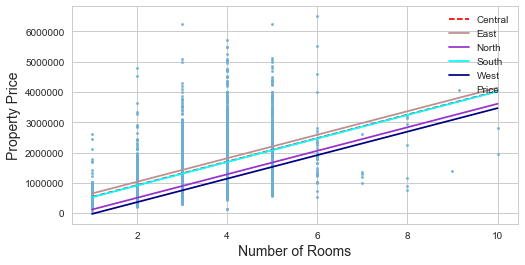

In [63]:
fig, ax = plt.subplots()
ax.scatter(melHousing['Rooms'], melHousing['Price'], c=COLOR18, s = 6)
ax.set_ylabel(r'Property Price', size = 14)
ax.set_xlabel(r'Number of Rooms', size = 14)

result = sm.ols(formula='Price ~ Rooms + C(Region)', data=melHousing).fit()
room_linspace = np.linspace(melHousing['Rooms'].min(), melHousing['Rooms'].max(), 100000)

#Central Region
plt.plot(room_linspace, result.params[0] + result.params[5] * room_linspace, color='red', label='Central', linestyle='--')
#East Region
plt.plot(room_linspace, result.params[0] + result.params[5] * room_linspace + result.params[1] * 1, color='rosybrown', label='East')
#North Region
plt.plot(room_linspace, result.params[0] + result.params[5] * room_linspace + result.params[2] * 1, color='darkorchid', label='North')
#South Region
plt.plot(room_linspace, result.params[0] + result.params[5] * room_linspace + result.params[3] * 1, color='aqua', label='South')
#West Region
plt.plot(room_linspace, result.params[0] + result.params[5] * room_linspace + result.params[4] * 1, color='navy', label='West')

plt.legend(loc='upper right', numpoints = 1)
plt.show()

** We noticed that the lines are parallel. This is because the categorical variable affects only the intercept not the slope which is a function of Number of Rooms. From the graph we can say that the properties in the East region are the costliest as compare to other region properties. **

** Excluding Region and adding Property Type in the analysis **

In [64]:
# Performing Ordinary Least Square (OLS) regression on the Property Price as the function of 
#'Distance from CBD' + 'Number of Rooms' + 'Property Type' as Categorical variable
result = sm.ols(formula='Price ~ Distance + Rooms + Car + C(Type)-1', data=melHousing).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     1146.
Date:                Sat, 03 Jun 2017   Prob (F-statistic):               0.00
Time:                        19:41:44   Log-Likelihood:            -1.0809e+05
No. Observations:                7443   AIC:                         2.162e+05
Df Residuals:                    7437   BIC:                         2.162e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
C(Type)[h]  5.991e+05   2.62e+04     22.830      0.000      5.48e+05  6.51e+05
C(Type)[t]  3.604e+05   3.03e+04     11.910      0.000      3.01e+05   4.2e+05
C(Type)[u]  2.469e+05   2.01e+04     12.306      0.000      2.08e+05  2.86e+05
Distance   -5.265e+04   1698.067    -31.003      0.000      -5.6e+04 -4.93e+04
Rooms        3.19e+05   7704.571     41.399      0.000      3.04e+05  3.34e+05
Car         9.089e+04   6911.209     13.151      0.000      7.73e+04  1.04e+05
==============================================================================
Omnibus:                     3325.346   Durbin-Watson:                   1.228
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            28876.155
Skew:                           1.930   Prob(JB):                         0.00
Kurtosis:                      11.844   Cond. No.                         70.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
# Capturing OLS Result in tabular format 
modelName = 'Property Price(Y) ~ Distance from CBD(X1) + Number of Rooms(X2) + Number of Cars that can fit into the Garage(X3) +(C)Property Type(X4)'
analysisResult = analysisResult.append(_capture_Result(modelName, result), ignore_index=True)
analysisResult

,RegressionModel,R-squared,AdjR-squared,F-stat,Co-eff,SE,t,P>|t|,95%ConfInt
0,Property Price(Y) ~ Distance from CBD(X),0.00549019208666,0.00538460658842,51.9975960547,Intercept|1192480.65225 Distance|-13621.972...,Intercept|17856.5054294 Distance|1889.07142...,Intercept|66.7813003481 Distance|-7.2109358...,Intercept|0.0 Distance|5.98504272152e-13,0 1\nInterce...
1,Property Price(Y) ~ Property Sold Date(X),0.00111198254599,0.00100593222032,10.4854232082,Intercept|-133365691.267 gDate|182.60902901...,Intercept|41517639.23 gDate|56.3935280222,Intercept|-3.21226576802 gDate|3.2381203202...,Intercept|0.00132135318412 gDate|0.00120736...,0 1\nInterce...
2,Property Price(Y) ~ Number of Rooms(X),0.31482672889,0.314753985152,4327.88768105,Intercept|-25766.9380707 Rooms|385203.39290...,Intercept|17635.6990117 Rooms|5855.33993222...,Intercept|-1.46106701263 Rooms|65.786683158...,Intercept|0.14403040883 Rooms|0.0,0 1\nInter...
3,Property Price(Y) ~ Number of Cars fir into th...,0.0865104698585,0.0863877055082,704.687229548,Intercept|762740.537267 Car|208655.367009,Intercept|14006.6782749 Car|7860.15950963,Intercept|54.4554906093 Car|26.545945633,Intercept|0.0 Car|1.97064756011e-148,0 1\nInter...
4,Property Price(Y) ~ Distance from CBD(X1) + Pr...,0.380896452147,0.3806992226,1931.23422962,Intercept|-156766972.867 Distance|-48938.23...,Intercept|32691589.4042 Distance|1562.57682...,Intercept|-4.79533041138 Distance|-31.31892...,Intercept|1.64896819259e-06 Distance|6.4696...,0 1\nInterce...
5,Property Price(Y) ~ Distance from CBD(X1) + Nu...,0.379379931597,0.379248137146,2878.57288032,Intercept|245716.370303 Distance|-48963.499...,Intercept|18893.9974162 Distance|1564.39752...,Intercept|13.0049965018 Distance|-31.298630...,Intercept|2.44864196505e-38 Distance|1.1483...,0 1\nInter...
6,Property Price(Y) ~ Distance from CBD(X1) + Nu...,0.112413131568,0.112174532948,471.139067406,Intercept|970831.137884 Distance|-30630.037...,Intercept|19750.5264383 Distance|2078.71185...,Intercept|49.1546967579 Distance|-14.735104...,Intercept|0.0 Distance|1.84067050338e-48 ...,0 1\nInterc...
7,Property Price(Y) ~ Number of Rooms(X1) + Numb...,0.326290780801,0.326109676172,1801.67002319,Intercept|-40449.7136074 Rooms|365836.75306...,Intercept|19706.2240554 Rooms|7109.35746929...,Intercept|-2.05263644084 Rooms|51.458483364...,Intercept|0.0401427532359 Rooms|0.0 Car|...,0 1\nInter...
8,Property Price(Y) ~ Number of Rooms(X1) + Numb...,0.395159237731,0.394915317541,1620.03497606,Intercept|219231.889351 Rooms|405185.411278...,Intercept|20695.3916287 Rooms|6870.98072889...,Intercept|10.5932708733 Rooms|58.9705352505...,Intercept|4.90489523335e-26 Rooms|0.0 Ca...,0 1\nInter...
9,Property Price(Y) ~ Distance from CBD(X1) + Nu...,0.519615738106,0.519163459715,1148.88473347,C(Region)[Central]|278890.321327 C(Region)[...,C(Region)[Central]|18568.47405 C(Region)[Ea...,C(Region)[Central]|15.0195606045 C(Region)[...,C(Region)[Central]|2.96935118294e-50 C(Regi...,0 ...


** Now we are trying to depict pictorially the impact of Categorical variable 'Property Type' while studying the relationship between the 'Price' and the 'Number of Rooms' **

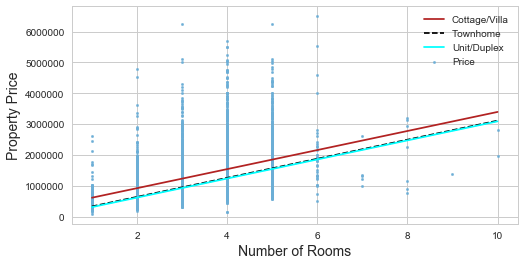

In [66]:
fig, ax = plt.subplots()
ax.scatter(melHousing['Rooms'], melHousing['Price'], c=COLOR18, s = 6)
ax.set_ylabel(r'Property Price', size = 14)
ax.set_xlabel(r'Number of Rooms', size = 14)

result = sm.ols(formula='Price ~ Rooms + C(Type)', data=melHousing).fit()
room_linspace = np.linspace(melHousing['Rooms'].min(), melHousing['Rooms'].max(), 100000)

#Property Type - 'h' house, cottage
plt.plot(room_linspace, result.params[0] + result.params[3] * room_linspace, color='firebrick', label='Cottage/Villa')
#Property Type - 't' townhome
plt.plot(room_linspace, result.params[0] + result.params[3] * room_linspace + result.params[1] * 1, color='black', label='Townhome', linestyle='--')
#Property Type - 'u' unit, duplex
plt.plot(room_linspace, result.params[0] + result.params[3] * room_linspace + result.params[2] * 1, color='aqua', label='Unit/Duplex')

plt.legend(loc='upper right', numpoints = 1)
plt.show()

** We noticed that the lines are parallel. This is because the categorical variable affects only the intercept not the slope which is a function of Number of Rooms. From the graph we can say that the Cottage/Villa are the costliest as compare to other type of properties. And also the property types like Townhome, Duplex don't have any sigficant impact on price rise as the number of room increases.**

** Now adding both Region and Property Type as Categorical variables in the analysis **

In [67]:
melNWhousing = melHousing[melHousing['Region'].str.strip() != 'West']
melNWhousing.count()

Suburb          8522
Address         8522
Rooms           8522
Type            8522
Price           8522
Method          8522
SellerG         8522
Date            8522
Distance        8522
Postcode        8522
Bedroom2        6700
Bathroom        6700
Car             6700
Landsize        8522
BuildingArea    3730
YearBuilt       4298
CouncilArea     6693
Lattitude       6761
Longtitude      6761
City            8522
Region          8522
gDate           8522
dtype: int64

In [68]:
# Performing Ordinary Least Square (OLS) regression on the Property Price as the function of 
#'Distance from CBD' + 'Number of Rooms' + 'Number of Cars that can fit into the Garage' +'Region' + 'Property Type'. 
#Both 'Region' and 'Property Type' are considered as Categorical variables
result = sm.ols(formula='Price ~ Distance + Rooms + Car + C(Region + Type)-1', data=melHousing).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     685.1
Date:                Sat, 03 Jun 2017   Prob (F-statistic):               0.00
Time:                        19:41:45   Log-Likelihood:            -1.0671e+05
No. Observations:                7443   AIC:                         2.134e+05
Df Residuals:                    7425   BIC:                         2.136e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
C(Region + Type)[Centralh]  8.715e+05   2.36e+04     37.006      0.000      8.25e+05  9.18e+05
C(Region + Type)[Centralt]  4.495e+05   4.67e+04      9.627      0.000      3.58e+05  5.41e+05
C(Region + Type)[Centralu]  3.001e+05   2.02e+04     14.874      0.000      2.61e+05   3.4e+05
C(Region + Type)[Easth]     1.311e+06   3.11e+04     42.097      0.000      1.25e+06  1.37e+06
C(Region + Type)[Eastt]     8.014e+05   4.99e+04     16.063      0.000      7.04e+05  8.99e+05
C(Region + Type)[Eastu]     4.966e+05   3.12e+04     15.934      0.000      4.36e+05  5.58e+05
C(Region + Type)[Northh]    5.894e+05   2.67e+04     22.046      0.000      5.37e+05  6.42e+05
C(Region + Type)[Northt]     4.38e+05   3.57e+04     12.266      0.000      3.68e+05  5.08e+05
C(Region + Type)[Northu]    3.997e+05   2.75e+04     14.530      0.000      3.46e+05  4.54e+05
C(Region + Type)[Southh]    1.252e+06   3.11e+04     40.270      0.000      1.19e+06  1.31e+06
C(Region + Type)[Southt]    9.079e+05   4.17e+04     21.795      0.000      8.26e+05   9.9e+05
C(Region + Type)[Southu]    6.274e+05   2.86e+04     21.912      0.000      5.71e+05  6.84e+05
C(Region + Type)[Westh]     4.766e+05   3.11e+04     15.342      0.000      4.16e+05  5.37e+05
C(Region + Type)[Westt]      3.51e+05   5.35e+04      6.563      0.000      2.46e+05  4.56e+05
C(Region + Type)[Westu]     3.141e+05   4.62e+04      6.797      0.000      2.23e+05  4.05e+05
Distance                   -6.317e+04   1880.050    -33.600      0.000     -6.69e+04 -5.95e+04
Rooms                       2.672e+05   6512.101     41.035      0.000      2.54e+05   2.8e+05
Car                         8.956e+04   5806.991     15.422      0.000      7.82e+04  1.01e+05
==============================================================================
Omnibus:                     3935.545   Durbin-Watson:                   1.603
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            54832.888
Skew:                           2.214   Prob(JB):                         0.00
Kurtosis:                      15.538   Cond. No.                         189.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
# Capturing OLS Result in tabular format 
modelName = 'Property Price(Y) ~ Distance from CBD(X1) + Number of Rooms(X2) + Number of Cars that can fit into the Garage(X3) +(C)Region(X4) + (C)Property Type(X5)'
analysisResult = analysisResult.append(_capture_Result(modelName, result), ignore_index=True)
analysisResult

,RegressionModel,R-squared,AdjR-squared,F-stat,Co-eff,SE,t,P>|t|,95%ConfInt
0,Property Price(Y) ~ Distance from CBD(X),0.00549019208666,0.00538460658842,51.9975960547,Intercept|1192480.65225 Distance|-13621.972...,Intercept|17856.5054294 Distance|1889.07142...,Intercept|66.7813003481 Distance|-7.2109358...,Intercept|0.0 Distance|5.98504272152e-13,0 1\nInterce...
1,Property Price(Y) ~ Property Sold Date(X),0.00111198254599,0.00100593222032,10.4854232082,Intercept|-133365691.267 gDate|182.60902901...,Intercept|41517639.23 gDate|56.3935280222,Intercept|-3.21226576802 gDate|3.2381203202...,Intercept|0.00132135318412 gDate|0.00120736...,0 1\nInterce...
2,Property Price(Y) ~ Number of Rooms(X),0.31482672889,0.314753985152,4327.88768105,Intercept|-25766.9380707 Rooms|385203.39290...,Intercept|17635.6990117 Rooms|5855.33993222...,Intercept|-1.46106701263 Rooms|65.786683158...,Intercept|0.14403040883 Rooms|0.0,0 1\nInter...
3,Property Price(Y) ~ Number of Cars fir into th...,0.0865104698585,0.0863877055082,704.687229548,Intercept|762740.537267 Car|208655.367009,Intercept|14006.6782749 Car|7860.15950963,Intercept|54.4554906093 Car|26.545945633,Intercept|0.0 Car|1.97064756011e-148,0 1\nInter...
4,Property Price(Y) ~ Distance from CBD(X1) + Pr...,0.380896452147,0.3806992226,1931.23422962,Intercept|-156766972.867 Distance|-48938.23...,Intercept|32691589.4042 Distance|1562.57682...,Intercept|-4.79533041138 Distance|-31.31892...,Intercept|1.64896819259e-06 Distance|6.4696...,0 1\nInterce...
5,Property Price(Y) ~ Distance from CBD(X1) + Nu...,0.379379931597,0.379248137146,2878.57288032,Intercept|245716.370303 Distance|-48963.499...,Intercept|18893.9974162 Distance|1564.39752...,Intercept|13.0049965018 Distance|-31.298630...,Intercept|2.44864196505e-38 Distance|1.1483...,0 1\nInter...
6,Property Price(Y) ~ Distance from CBD(X1) + Nu...,0.112413131568,0.112174532948,471.139067406,Intercept|970831.137884 Distance|-30630.037...,Intercept|19750.5264383 Distance|2078.71185...,Intercept|49.1546967579 Distance|-14.735104...,Intercept|0.0 Distance|1.84067050338e-48 ...,0 1\nInterc...
7,Property Price(Y) ~ Number of Rooms(X1) + Numb...,0.326290780801,0.326109676172,1801.67002319,Intercept|-40449.7136074 Rooms|365836.75306...,Intercept|19706.2240554 Rooms|7109.35746929...,Intercept|-2.05263644084 Rooms|51.458483364...,Intercept|0.0401427532359 Rooms|0.0 Car|...,0 1\nInter...
8,Property Price(Y) ~ Number of Rooms(X1) + Numb...,0.395159237731,0.394915317541,1620.03497606,Intercept|219231.889351 Rooms|405185.411278...,Intercept|20695.3916287 Rooms|6870.98072889...,Intercept|10.5932708733 Rooms|58.9705352505...,Intercept|4.90489523335e-26 Rooms|0.0 Ca...,0 1\nInter...
9,Property Price(Y) ~ Distance from CBD(X1) + Nu...,0.519615738106,0.519163459715,1148.88473347,C(Region)[Central]|278890.321327 C(Region)[...,C(Region)[Central]|18568.47405 C(Region)[Ea...,C(Region)[Central]|15.0195606045 C(Region)[...,C(Region)[Central]|2.96935118294e-50 C(Regi...,0 ...


###### Graphical Representation of the above Regression analysis ######

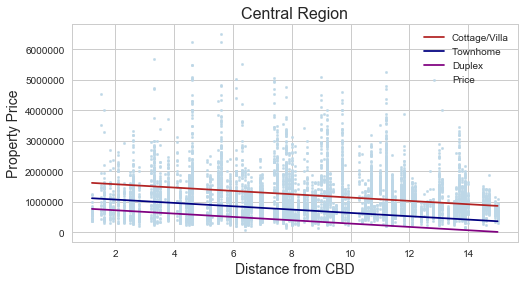

In [70]:
fig, ax = plt.subplots()
ax.scatter(melHousing['Distance'], melHousing['Price'], c=COLOR17, s = 6)
ax.set_ylabel(r'Property Price', size = 14)
ax.set_xlabel(r'Distance from CBD', size = 14)

result = sm.ols(formula='Price ~ Distance + C(Region + Type)-1', data=melHousing).fit()
distance_linspace = np.linspace(melHousing['Distance'].min(), melHousing['Distance'].max(), 100000)

#Property Type - 'h' house, cottage
plt.plot(distance_linspace, result.params[15] * distance_linspace + result.params[0] * 1, color='firebrick', label='Cottage/Villa')
#Property Type - 't' townhome
plt.plot(distance_linspace, result.params[15] * distance_linspace + result.params[1] * 1, color='navy', label='Townhome')
#Property Type - 'u' unit, duplex
plt.plot(distance_linspace, result.params[15] * distance_linspace + result.params[2] * 1, color='purple', label='Duplex')
plt.title('Central Region', size = 16)
plt.legend(loc='upper right', numpoints = 1)
plt.show()

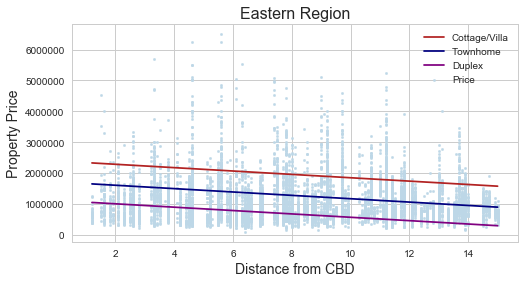

In [71]:
fig, ax = plt.subplots()
ax.scatter(melHousing['Distance'], melHousing['Price'], c=COLOR17, s = 6)
ax.set_ylabel(r'Property Price', size = 14)
ax.set_xlabel(r'Distance from CBD', size = 14)

result = sm.ols(formula='Price ~ Distance + C(Region + Type)-1', data=melHousing).fit()
distance_linspace = np.linspace(melHousing['Distance'].min(), melHousing['Distance'].max(), 100000)

#Property Type - 'h' house, cottage
plt.plot(distance_linspace, result.params[15] * distance_linspace + result.params[3] * 1, color='firebrick', label='Cottage/Villa')
#Property Type - 't' townhome
plt.plot(distance_linspace, result.params[15] * distance_linspace + result.params[4] * 1, color='navy', label='Townhome')
#Property Type - 'u' unit, duplex
plt.plot(distance_linspace, result.params[15] * distance_linspace + result.params[5] * 1, color='purple', label='Duplex')
plt.title('Eastern Region', size = 16)
plt.legend(loc='upper right', numpoints = 1)
plt.show()

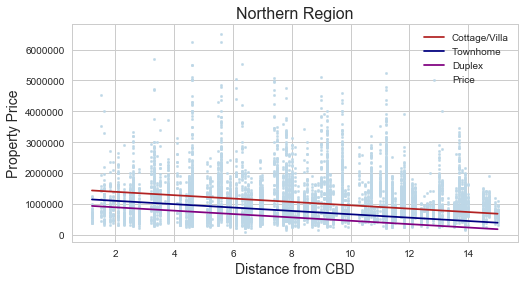

In [72]:
fig, ax = plt.subplots()
ax.scatter(melHousing['Distance'], melHousing['Price'], c=COLOR17, s = 6)
ax.set_ylabel(r'Property Price', size = 14)
ax.set_xlabel(r'Distance from CBD', size = 14)

result = sm.ols(formula='Price ~ Distance + C(Region + Type)-1', data=melHousing).fit()
distance_linspace = np.linspace(melHousing['Distance'].min(), melHousing['Distance'].max(), 100000)

#Property Type - 'h' house, cottage
plt.plot(distance_linspace, result.params[15] * distance_linspace + result.params[6] * 1, color='firebrick', label='Cottage/Villa')
#Property Type - 't' townhome
plt.plot(distance_linspace, result.params[15] * distance_linspace + result.params[7] * 1, color='navy', label='Townhome')
#Property Type - 'u' unit, duplex
plt.plot(distance_linspace, result.params[15] * distance_linspace + result.params[8] * 1, color='purple', label='Duplex')
plt.title('Northern Region', size = 16)
plt.legend(loc='upper right', numpoints = 1)
plt.show()

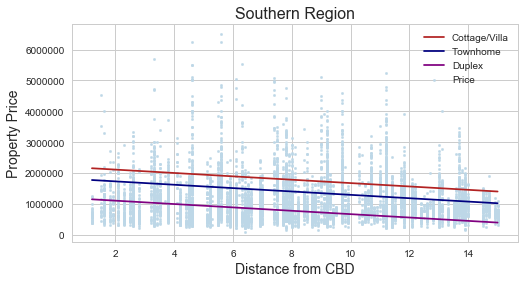

In [73]:
fig, ax = plt.subplots()
ax.scatter(melHousing['Distance'], melHousing['Price'], c=COLOR17, s = 6)
ax.set_ylabel(r'Property Price', size = 14)
ax.set_xlabel(r'Distance from CBD', size = 14)

result = sm.ols(formula='Price ~ Distance + C(Region + Type)-1', data=melHousing).fit()
distance_linspace = np.linspace(melHousing['Distance'].min(), melHousing['Distance'].max(), 100000)

#Property Type - 'h' house, cottage
plt.plot(distance_linspace, result.params[15] * distance_linspace + result.params[9] * 1, color='firebrick', label='Cottage/Villa')
#Property Type - 't' townhome
plt.plot(distance_linspace, result.params[15] * distance_linspace + result.params[10] * 1, color='navy', label='Townhome')
#Property Type - 'u' unit, duplex
plt.plot(distance_linspace, result.params[15] * distance_linspace + result.params[11] * 1, color='purple', label='Duplex')
plt.title('Southern Region', size = 16)
plt.legend(loc='upper right', numpoints = 1)
plt.show()

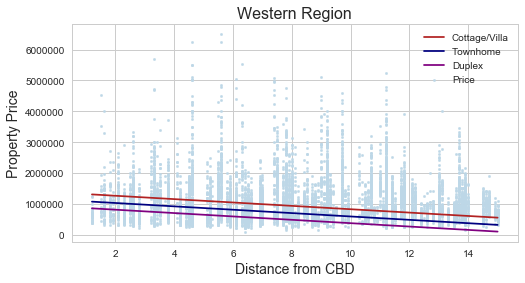

In [74]:
fig, ax = plt.subplots()
ax.scatter(melHousing['Distance'], melHousing['Price'], c=COLOR17, s = 6)
ax.set_ylabel(r'Property Price', size = 14)
ax.set_xlabel(r'Distance from CBD', size = 14)

result = sm.ols(formula='Price ~ Distance + C(Region + Type)-1', data=melHousing).fit()
distance_linspace = np.linspace(melHousing['Distance'].min(), melHousing['Distance'].max(), 100000)

#Property Type - 'h' house, cottage
plt.plot(distance_linspace, result.params[15] * distance_linspace + result.params[12] * 1, color='firebrick', label='Cottage/Villa')
#Property Type - 't' townhome
plt.plot(distance_linspace, result.params[15] * distance_linspace + result.params[13] * 1, color='navy', label='Townhome')
#Property Type - 'u' unit, duplex
plt.plot(distance_linspace, result.params[15] * distance_linspace + result.params[14] * 1, color='purple', label='Duplex')
plt.title('Western Region', size = 16)
plt.legend(loc='upper right', numpoints = 1)
plt.show()

** From the above 5 figures we can say that the price of a property decreases steadily as the distance from CBD increases.  It is true across all regions.  And another intertesting observation that across all regions, among the properties Cottages/regular houses are the costliest and on the otherhand duplex properties are less expensive, rather affordable. 
The properties in the 'Eastern' region for all property types are the most expensive whereas the price of the properties in the 'Western' region are the lowest. ** 

###### Analysis of the Regression models created so-far and suggest the best model which fits to the dataset accurately ######

In [75]:
analysisResult

,RegressionModel,R-squared,AdjR-squared,F-stat,Co-eff,SE,t,P>|t|,95%ConfInt
0,Property Price(Y) ~ Distance from CBD(X),0.00549019208666,0.00538460658842,51.9975960547,Intercept|1192480.65225 Distance|-13621.972...,Intercept|17856.5054294 Distance|1889.07142...,Intercept|66.7813003481 Distance|-7.2109358...,Intercept|0.0 Distance|5.98504272152e-13,0 1\nInterce...
1,Property Price(Y) ~ Property Sold Date(X),0.00111198254599,0.00100593222032,10.4854232082,Intercept|-133365691.267 gDate|182.60902901...,Intercept|41517639.23 gDate|56.3935280222,Intercept|-3.21226576802 gDate|3.2381203202...,Intercept|0.00132135318412 gDate|0.00120736...,0 1\nInterce...
2,Property Price(Y) ~ Number of Rooms(X),0.31482672889,0.314753985152,4327.88768105,Intercept|-25766.9380707 Rooms|385203.39290...,Intercept|17635.6990117 Rooms|5855.33993222...,Intercept|-1.46106701263 Rooms|65.786683158...,Intercept|0.14403040883 Rooms|0.0,0 1\nInter...
3,Property Price(Y) ~ Number of Cars fir into th...,0.0865104698585,0.0863877055082,704.687229548,Intercept|762740.537267 Car|208655.367009,Intercept|14006.6782749 Car|7860.15950963,Intercept|54.4554906093 Car|26.545945633,Intercept|0.0 Car|1.97064756011e-148,0 1\nInter...
4,Property Price(Y) ~ Distance from CBD(X1) + Pr...,0.380896452147,0.3806992226,1931.23422962,Intercept|-156766972.867 Distance|-48938.23...,Intercept|32691589.4042 Distance|1562.57682...,Intercept|-4.79533041138 Distance|-31.31892...,Intercept|1.64896819259e-06 Distance|6.4696...,0 1\nInterce...
5,Property Price(Y) ~ Distance from CBD(X1) + Nu...,0.379379931597,0.379248137146,2878.57288032,Intercept|245716.370303 Distance|-48963.499...,Intercept|18893.9974162 Distance|1564.39752...,Intercept|13.0049965018 Distance|-31.298630...,Intercept|2.44864196505e-38 Distance|1.1483...,0 1\nInter...
6,Property Price(Y) ~ Distance from CBD(X1) + Nu...,0.112413131568,0.112174532948,471.139067406,Intercept|970831.137884 Distance|-30630.037...,Intercept|19750.5264383 Distance|2078.71185...,Intercept|49.1546967579 Distance|-14.735104...,Intercept|0.0 Distance|1.84067050338e-48 ...,0 1\nInterc...
7,Property Price(Y) ~ Number of Rooms(X1) + Numb...,0.326290780801,0.326109676172,1801.67002319,Intercept|-40449.7136074 Rooms|365836.75306...,Intercept|19706.2240554 Rooms|7109.35746929...,Intercept|-2.05263644084 Rooms|51.458483364...,Intercept|0.0401427532359 Rooms|0.0 Car|...,0 1\nInter...
8,Property Price(Y) ~ Number of Rooms(X1) + Numb...,0.395159237731,0.394915317541,1620.03497606,Intercept|219231.889351 Rooms|405185.411278...,Intercept|20695.3916287 Rooms|6870.98072889...,Intercept|10.5932708733 Rooms|58.9705352505...,Intercept|4.90489523335e-26 Rooms|0.0 Ca...,0 1\nInter...
9,Property Price(Y) ~ Distance from CBD(X1) + Nu...,0.519615738106,0.519163459715,1148.88473347,C(Region)[Central]|278890.321327 C(Region)[...,C(Region)[Central]|18568.47405 C(Region)[Ea...,C(Region)[Central]|15.0195606045 C(Region)[...,C(Region)[Central]|2.96935118294e-50 C(Regi...,0 ...


** After carefully analysing the results of all the Regression models we can conclude that the model mentioned in Row#8 is the most justified as far as the available data and its important/impacting independent varibales are concerned. Because it has the highest R-squared and Adjusted R-squared values. The condition number is pretty low - it signifies that there is no/negligible multicollinearity between the 2 Independent variables (Distance from CBD and Number of Rooms). The Adjusted R-squared is also same as the R-squared value. Among all the models it has relatively high F-stat value. The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect). A low/tend to zero p-value (< 0.05) indicates that we can reject the null hypothesis. In other words, a predictor that has a low p-value is likely to be a meaningful addition to the model because changes in the predictor's value are related to changes in the response variable. 
And most importantly the relationships between the IVs and DV established in the model are meaningful because as the number of rooms goes up the price of the property would go up and similarly as the property moves further from CBD the price of the property decreases. The region and type of property have positive impact on the price where cottage is expensive than a duplex/small unit.

In [76]:
result = sm.ols(formula='Price ~ Distance + Rooms + Car + C(Region + Type)-1', data=melHousing).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     685.1
Date:                Sat, 03 Jun 2017   Prob (F-statistic):               0.00
Time:                        19:41:49   Log-Likelihood:            -1.0671e+05
No. Observations:                7443   AIC:                         2.134e+05
Df Residuals:                    7425   BIC:                         2.136e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
C(Region + Type)[Centralh]  8.715e+05   2.36e+04     37.006      0.000      8.25e+05  9.18e+05
C(Region + Type)[Centralt]  4.495e+05   4.67e+04      9.627      0.000      3.58e+05  5.41e+05
C(Region + Type)[Centralu]  3.001e+05   2.02e+04     14.874      0.000      2.61e+05   3.4e+05
C(Region + Type)[Easth]     1.311e+06   3.11e+04     42.097      0.000      1.25e+06  1.37e+06
C(Region + Type)[Eastt]     8.014e+05   4.99e+04     16.063      0.000      7.04e+05  8.99e+05
C(Region + Type)[Eastu]     4.966e+05   3.12e+04     15.934      0.000      4.36e+05  5.58e+05
C(Region + Type)[Northh]    5.894e+05   2.67e+04     22.046      0.000      5.37e+05  6.42e+05
C(Region + Type)[Northt]     4.38e+05   3.57e+04     12.266      0.000      3.68e+05  5.08e+05
C(Region + Type)[Northu]    3.997e+05   2.75e+04     14.530      0.000      3.46e+05  4.54e+05
C(Region + Type)[Southh]    1.252e+06   3.11e+04     40.270      0.000      1.19e+06  1.31e+06
C(Region + Type)[Southt]    9.079e+05   4.17e+04     21.795      0.000      8.26e+05   9.9e+05
C(Region + Type)[Southu]    6.274e+05   2.86e+04     21.912      0.000      5.71e+05  6.84e+05
C(Region + Type)[Westh]     4.766e+05   3.11e+04     15.342      0.000      4.16e+05  5.37e+05
C(Region + Type)[Westt]      3.51e+05   5.35e+04      6.563      0.000      2.46e+05  4.56e+05
C(Region + Type)[Westu]     3.141e+05   4.62e+04      6.797      0.000      2.23e+05  4.05e+05
Distance                   -6.317e+04   1880.050    -33.600      0.000     -6.69e+04 -5.95e+04
Rooms                       2.672e+05   6512.101     41.035      0.000      2.54e+05   2.8e+05
Car                         8.956e+04   5806.991     15.422      0.000      7.82e+04  1.01e+05
==============================================================================
Omnibus:                     3935.545   Durbin-Watson:                   1.603
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            54832.888
Skew:                           2.214   Prob(JB):                         0.00
Kurtosis:                      15.538   Cond. No.                         189.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
#Scatter Plot between the Original and the Predicted prices
#plt.scatter(melHousing['Price'], result.fittedvalues, s=2)
#plt.xlabel("Original Property Price")
#plt.ylabel("Predicted Property Price")
#plt.title("Relationship between Predicted and Original Property Price")
#plt.show()

** We observe strong positive correlation between the Original and the Predicted price.**

** *The Residual vs Fitted plot* **

In [80]:
#plt.scatter(result.fittedvalues, melHousing['Price'] - result.fittedvalues, c=COLOR31, s=2, alpha=0.5)
#plt.hlines(y = 0, xmin=0, xmax = 3000000)
#plt.xlabel("Predicted Property Price", size = 14)
#plt.ylabel("Residuals", size = 14)
#plt.show()

*Residual plots are a good way to visualize the errors in the data.  If we can derive the right regression model then the data should be randomly scattered around the line zero. In this case the Residuals against the Predicted Property Price have been scattered randomly around the line Zero (X=0). The derived model seemed to be right.*

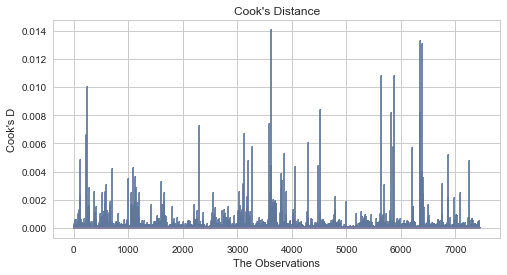

In [81]:
influence = result.get_influence()
#c is the distance and p is p-value
(c, p) = influence.cooks_distance
plt.stem(np.arange(len(c)), c, markerfmt=",")
plt.xlabel("The Observations")
plt.ylabel("Cook's D")
plt.title("Cook's Distance")
plt.show()

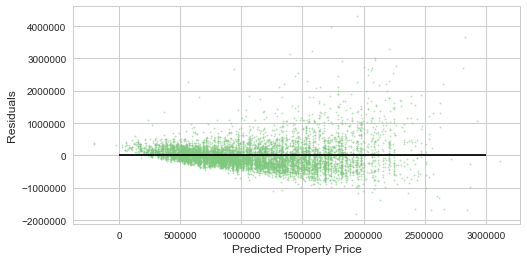

In [82]:
plt.scatter(result.fittedvalues, result.resid, c=COLOR31, s=2, alpha=0.5)
plt.hlines(y = 0, xmin=0, xmax = 3000000)
plt.xlabel("Predicted Property Price", size = 12)
plt.ylabel("Residuals", size = 12)
plt.show()

** *The Q-Q plot of Residuals* **

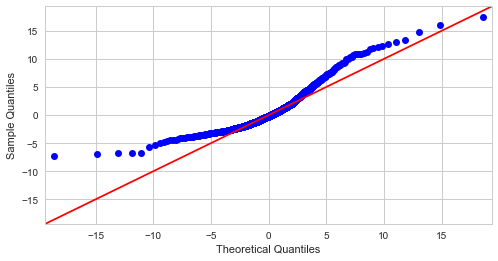

In [84]:
fig = sm1.qqplot(result.resid, stats.t, fit=True, line='45', distargs=(16,))
plt.show()

** *The Influence plot* **

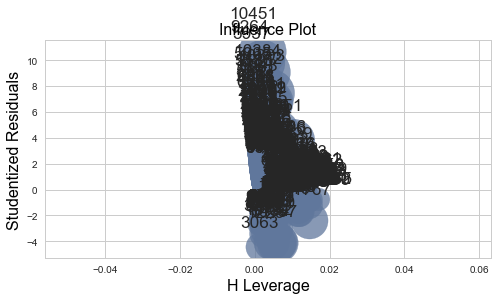

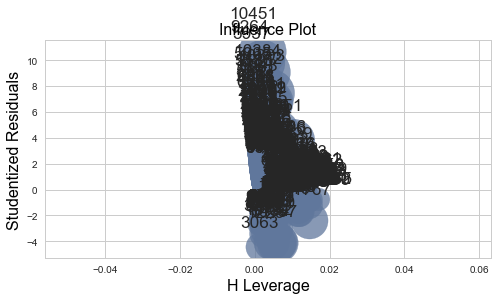

In [85]:
influence_plot(result)

#### Now the important question: If an individual wants to get a unit with two rooms, have it within cycling distance (2-3 Kms) of CBD (most likely the work place), how much the individual has to pay?? ####

*From the Regression model, assuming Central Region with Property Type as 'Unit'*

In [86]:
#Coefficients
RegionUType = 300059
DisFrmCBD = -63171
NumOfRoom = 267220
NumOfCar = 89556

#The property price assuming Distance from CBD is 2 KM and number of rooms is 2
PP1 = DisFrmCBD*2 + NumOfRoom*2 + NumOfCar*1 + RegionUType
print('The price of the Property which located 2 KM from CBD is AUD',PP1)

#The property price assuming Distance from CBD is 3 KM and number of rooms is 2
PP2 = DisFrmCBD*3 + NumOfRoom*2 + NumOfCar*1 + RegionUType
print('The price of the Property which located 3 KM from CBD is AUD',PP2)

The price of the Property which located 2 KM from CBD is AUD 797713
The price of the Property which located 3 KM from CBD is AUD 734542


*From the Regression model, assuming Eastern Region with Property Type as 'Unit'*

In [87]:
#Coefficients
RegionUType = 496622
DisFrmCBD = -63171
NumOfRoom = 267220
NumOfCar = 89556

#The property price assuming Distance from CBD is 2 KM and number of rooms is 2
PP1 = DisFrmCBD*2 + NumOfRoom*2 + NumOfCar*1 + RegionUType
print('The price of the Property which located 2 KM from CBD is AUD',PP1)

#The property price assuming Distance from CBD is 3 KM and number of rooms is 2
PP2 = DisFrmCBD*3 + NumOfRoom*2 + NumOfCar*1 + RegionUType
print('The price of the Property which located 3 KM from CBD is AUD',PP2)

The price of the Property which located 2 KM from CBD is AUD 994276
The price of the Property which located 3 KM from CBD is AUD 931105


*From the Regression model, assuming Western Region with Property Type as 'Unit'*

In [88]:
#Coefficients
RegionUType = 314062   
DisFrmCBD = -63171
NumOfRoom = 267220
NumOfCar = 89556

#The property price assuming Distance from CBD is 2 KM and number of rooms is 2
PP1 = DisFrmCBD*2 + NumOfRoom*2 + NumOfCar*1 + RegionUType
print('The price of the Property which located 2 KM from CBD is AUD',PP1)

#The property price assuming Distance from CBD is 3 KM and number of rooms is 2
PP2 = DisFrmCBD*3 + NumOfRoom*2 + NumOfCar*1 + RegionUType
print('The price of the Property which located 3 KM from CBD is AUD',PP2)

The price of the Property which located 2 KM from CBD is AUD 811716
The price of the Property which located 3 KM from CBD is AUD 748545


*From the Regression model, assuming Northern Region with Property Type as 'Unit'*

In [89]:
#Coefficients
RegionUType = 399726
DisFrmCBD = -63171
NumOfRoom = 267220
NumOfCar = 89556

#The property price assuming Distance from CBD is 2 KM and number of rooms is 2
PP1 = DisFrmCBD*2 + NumOfRoom*2 + RegionUType
print('The price of the Property which located 2 KM from CBD is AUD',PP1)

#The property price assuming Distance from CBD is 3 KM and number of rooms is 2
PP2 = DisFrmCBD*3 + NumOfRoom*2 + NumOfCar*1 + RegionUType
print('The price of the Property which located 3 KM from CBD is AUD',PP2)

The price of the Property which located 2 KM from CBD is AUD 807824
The price of the Property which located 3 KM from CBD is AUD 834209


*From the Regression model, assuming Southern Region with Property Type as 'Unit'*

In [90]:
#Coefficients
RegionUType = 627385
DisFrmCBD = -63171
NumOfRoom = 267220
NumOfCar = 89556

#The property price assuming Distance from CBD is 2 KM and number of rooms is 2
PP1 = DisFrmCBD*2 + NumOfRoom*2 + NumOfCar*1 + RegionUType
print('The price of the Property which located 2 KM from CBD is AUD',PP1)

#The property price assuming Distance from CBD is 3 KM and number of rooms is 2
PP2 = DisFrmCBD*3 + NumOfRoom*2 + NumOfCar*1 + RegionUType
print('The price of the Property which located 3 KM from CBD is AUD',PP2)

The price of the Property which located 2 KM from CBD is AUD 1125039
The price of the Property which located 3 KM from CBD is AUD 1061868


** From the above results it clearly shows that the Properties in Eastern and Southern region are expensive compare to the other regions. It is more starkling because the Property price of these regions are more than the property price of Central region which is surrounding the CBD. It is apparent there are other factors which are influencing the Property price. These factors are out of scope of current analysis due to non-availabiltiy of relevant data. ** 